![image](Images/sentimental_analysis_image_2.jpg)

# Twitter Sentiment Analysis : Apple vs. Google Products


# Project Overview

## 1. Introduction

In the modern digital economy, real-time customer feedback through platforms like Twitter plays a critical role in shaping brand perception. Social media sentiment provides businesses with an opportunity to directly understand public opinion, respond to customer concerns, and anticipate market trends. This project focuses on performing sentiment analysis on Twitter data related to Apple and Google products, aiming to categorize tweets as positive, negative, or neutral. These insights will support data-driven decisions in marketing, product development, and customer relationship management.



## 2. Understanding the Business Context

As global tech giants, Apple and Google are constantly in the public eye, with millions of users expressing their experiences and opinions online. Monitoring and analyzing this information manually is not feasible due to the volume and velocity of content. By automating sentiment classification using Natural Language Processing (NLP), companies can:

* Identify emerging issues or public relations risks early.

* Detect changes in customer satisfaction over time.

* Evaluate the public reception of product launches or updates.

* Benchmark brand sentiment against competitors.

Twitter has contracted our consulting firm to build an automated solution for extracting sentiment from tweets that mention these two major brands.



## 3. Business Problem Statement

The objective of this project is to build a sentiment analysis model capable of accurately classifying Twitter data into three sentiment categories — positive, negative, and neutral — specifically for content mentioning Apple and Google products.

This model will:

* Empower Twitter with the ability to deliver sentiment-based analytics to tech companies.

* Provide Apple and Google with actionable insights into customer feedback.

* Help both companies adapt and improve their products and communication strategies based on real-time public opinion.



## 4. Stakeholders
The primary stakeholders involved in this project include:

* **Twitter (Client):** Wants to enhance its platform’s business value by offering sentiment analysis capabilities to brands.

* **Apple and Google (End Users):** The insights from this model will inform their product development, customer support, and PR teams.

* **Marketing Teams:** Will use sentiment trends to assess campaign effectiveness and customer response.

* **Product Managers:** Can gauge user satisfaction after feature rollouts or product updates.

* **Data Science Team (Us):** Responsible for building, evaluating, and deploying the sentiment analysis model.

* **Executives & Strategic Decision Makers:** Interested in high-level insights that shape long-term business strategy.


## General Objective

To build and evaluate machine learning models capable of classifying the sentiment of tweets related to Apple and Google products into positive, negative, or neutral categories, enabling meaningful insights into public perception for strategic business decisions.



## Specific Objectives

* **To develop a binary sentiment classifier** using Logistic Regression and other models like Decision trees that distinguishes between positive and negative sentiments in tweets, with a benchmark accuracy of 85%.

* **To extend the model into a multiclass sentiment classifier** incorporating neutral sentiments using XGBoost and Multinomial Naive Bayes, with a benchmark accuracy of 70%.

* **To compare sentiment trends across Apple and Google products** by analyzing and visualizing the distribution of sentiment categories for each brand.



## Key Research Questions

* How accurately can a Logistic Regression model classify tweets into positive or negative sentiment categories?

* Can a multiclass classifier effectively distinguish between positive, negative, and neutral sentiments in tweets? Which model performs best for this task — XGBoost or MultinomialNB?

* What is the sentiment distribution across Apple and Google tweets, and are there noticeable differences in public perception between the two brands?

* How often is sentiment in the dataset directed specifically at a brand or product, and how does this impact model performance?

* What insights can be drawn from sentiment trends to help Apple and Google improve their customer experience and brand reputation?



# Data Understanding

For this project, we utilized a labeled dataset sourced from CrowdFlower (accessed via Data.world), containing approximately 9,000 tweets related to sentiments expressed about Apple, Google, and other technology products. The dataset is centered around analyzing how people feel about these brands, making it suitable for a sentiment analysis project.


## Dataset Size and Descriptive Statistics

The dataset we used in this project, titled data.csv, contains 9,093 rows and 3 columns, capturing Twitter sentiment data related to Apple, Google, and other technology products. This dataset, originally sourced from CrowdFlower via Data.world, serves as the foundation for building a sentiment analysis model capable of classifying tweets into positive, negative, or neutral categories.




## Data Preparation

To get the dataset ready for analysis, several preprocessing steps were carried out.

First, we removed duplicate tweets to avoid redundancy in the data. For missing values, any absent entries in the emotion_in_tweet_is_directed_at column were replaced with the label "none" to indicate no specific target, while the single record missing a tweet_text was dropped, as it could not be used in text-based modeling.

Next, we refined the text data using standard natural language processing techniques. This involved converting all text to lowercase, breaking down the tweets into individual tokens (words), eliminating common stopwords that add little meaning, and applying lemmatization to reduce words to their root forms.

These steps helped clean and standardize the tweet content, making it suitable for feature extraction and model training.


## Modeling

Several key libraries were used throughout the data preparation and modeling process:

* **NLTK (Natural Language Toolkit)** was utilized for essential text preprocessing tasks, including tokenization, stopword removal, and lemmatization.

* **Scikit-learn (sklearn)** provided tools for text vectorization, specifically through the CountVectorizer, and was also used for building and evaluating classification models.

* **Pandas** played a crucial role in handling data manipulation, cleaning, and managing missing values efficiently.


Initially, a binary classification approach was implemented using a Logistic Regression model to distinguish between positive and negative tweets, achieving a high level of accuracy and strong generalization. To broaden the evaluation, additional models were introduced, including a Random Forest (tuned using GridSearch), an unpruned and pruned Decision Tree, and a class‑weighted Decision Tree. These methods were selected to assess performance across different complexity and regularization levels, yielding a best test accuracy of 90% with the Logistic Regression model. A benchmark of 70% test accuracy was set as the target for this phase.

To further enhance the analysis, the approach was later extended to a multiclass classification problem by incorporating tweets with neutral sentiment, allowing the model to classify tweets into positive, negative, or neutral categories. In this setting, the best-performing model was an XGBoost Classifier tuned with GridSearchCV, achieving approximately 71% test accuracy. Compared to baseline alternatives such as Multinomial Naive Bayes and XGBoost with SMOTE, this tuned XGBoost model demonstrated:

Strong generalization across all classes, with especially high precision and recall for the dominant class (label 1).

The ability to capture complex patterns and feature interactions, critical for real‑world sentiment classification tasks.

Best Model Parameters for XGBoost:

{
    'colsample_bytree': 1,
    'learning_rate': 0.3,
    'max_depth': 7,
    'n_estimators': 200,
    'subsample': 1
}

## Testing Model

### Evaluation

To assess the effectiveness of the final sentiment analysis model, we utilized accuracy as the primary evaluation metric. Accuracy offered a straightforward and reliable measure of how well the model could correctly predict tweet sentiments—specifically identifying positive, negative, and neutral classifications.

This metric is widely used in sentiment analysis due to its simplicity and interpretability. It reflects the ratio of correctly classified tweets to the total number of tweets analyzed, offering a clear picture of the model’s overall performance across the dataset.

The Logistic Regression model, used for binary classification (positive vs. negative), delivered satisfactory results, meeting the performance expectations based on the defined benchmark. The results confirmed that the applied preprocessing methods and model selection contributed significantly to the model’s ability to make accurate predictions.

However, certain limitations were noted—most notably, the presence of missing values and inconsistencies in the dataset, which may have impacted model performance. These issues highlight the need for careful data handling and further model optimization.




# 3. Data Preparation and Cleaning

### Importing Essential Libraries

We will start by importing all libraries used throughout the notebook.



In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import FreqDist
from wordcloud import WordCloud

# modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_sample_weight



#imbalance libraries 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Loading the dataset

In [2]:
# loading and previewing data
data = pd.read_csv('Data\data.csv', encoding = 'ISO-8859-1')
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


After loading the dataset, we begin by performing a statistical summary to understand the distribution of the data. We also examine the structure of the DataFrame by checking its shape (number of rows and columns), retrieving general information about the dataset (including data types and missing values), and identifying which columns are numerical and which are non-numerical. This initial exploration helps us assess the overall composition of the dataset and informs our next steps in the analysis.


### Data Description

In [3]:
data.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


### Shape of the Data

In [4]:
data.shape

(9093, 3)

### Summary information of the Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


### Summary of Data Understanding

* The dataset has 3 columns namely:tweet_text, emotion_in_tweet_is_directed_at ,is_there_an_emotion_directed_at_a_brand_or_product

* The dataset has 9093 rows

* All the dataset's columns datatypes are objects

### Data Preparation

### Introduction

We will be preparing our data for analysis by checking for attributes such as;

* Missing values

* Duplicates

* Other inconsistencies as computed below

### Missing Values

In [6]:
#confirmation of null values
data.isnull().any()

tweet_text                                             True
emotion_in_tweet_is_directed_at                        True
is_there_an_emotion_directed_at_a_brand_or_product    False
dtype: bool

In [7]:
#calculate the percentage of missing values
data.isnull().mean() * 100

tweet_text                                             0.010997
emotion_in_tweet_is_directed_at                       63.807324
is_there_an_emotion_directed_at_a_brand_or_product     0.000000
dtype: float64

Two columns **tweet_text** and **emotion_in_tweet_is_directed_at** contain missing values, whereas the **is_there_an_emotion_directed_at_a_brand_or_product** column is complete and does not have any missing entries.

The next step is to address these missing values to ensure clean and consistent data for modeling.

* **Drop rows with missing tweet_text:**

Since this column contains the actual tweet content (which is essential for sentiment analysis), rows with missing tweet_text are not useful and should be removed:

In [8]:
#Dropping tweet_text column
data.dropna(axis=0,subset=['tweet_text'],inplace=True)


* **Fill missing values in emotion_in_tweet_is_directed_at:**

This column indicates the product the sentiment is directed at. Instead of dropping those rows, we can fill missing entries with a placeholder like 'none'


In [9]:
# replacing null values in recipient with none
data['emotion_in_tweet_is_directed_at'] = data['emotion_in_tweet_is_directed_at'].fillna('none')

Now that we have dropped the **tweet_text** and filled missing values in **emotion_in_tweet_is_directed_at**, we can proceed to check if actually that has been done

In [10]:
# confirmation if there are any missing values
data.isna().any()

tweet_text                                            False
emotion_in_tweet_is_directed_at                       False
is_there_an_emotion_directed_at_a_brand_or_product    False
dtype: bool

**Observation**

* No missing values

We also should confirm if the '**nan'** was also replaced with **'none'**

In [11]:
#confirming we replaced the 'nan' with 'none'
data['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
none                               5801
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: count, dtype: int64

In [12]:
data.isna().any()

tweet_text                                            False
emotion_in_tweet_is_directed_at                       False
is_there_an_emotion_directed_at_a_brand_or_product    False
dtype: bool

#### **Insights**
* We discovered that there is 0.01% missing values in tweet_text column and 63.81% missing values in emotion_in_tweet_is_directed_at column.

* We replaced the missing values in the **emotion_tweet_is directed_at** column with none for computational purposes and dropped the missing values in the **tweet_text** column

#### **Next Step: Handling Duplicates**

After addressing missing values, the next important step is to check for and handle duplicate records, which can negatively impact model performance by introducing bias or redundancy.

In [13]:
#number of duplicates
data.duplicated().sum()


np.int64(22)

We found 22 duplicate rows in the dataset. To keep the data clean and avoid repeating the same information, we will proceed to remove those duplicates.

In [14]:
#removing duplicates
data.drop_duplicates(subset=None, keep="first", inplace = True)

In [15]:
#confirmation if the duplicates were removed
data.duplicated().sum()

np.int64(0)

The data has no duplicates

#### **Insights** 

We found out that the tweet text column had 22 duplicates ( 0.242% ) and went ahead and dropped them.

### **Next Step: Renaming Long Column Names** 

Some of the column names in the dataset are too long and can be hard to work with. To make them easier to read and use in code, we will rename them to shorter, simpler versions.

In [16]:
# renaming the columns
data = data.rename(columns={'emotion_in_tweet_is_directed_at':'recipient',
                    'is_there_an_emotion_directed_at_a_brand_or_product':'emotion'})
data

,tweet_text,recipient,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",none,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",none,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,none,No emotion toward brand or product


**Insights**

We renamed the column **emotion_in_tweet_is_directed_at** to **recipient** and the column **is_there_an_emotion_directed_at_a_brand_or_product** to **emotion** to enhance clarity and facilitate their usage in our subsequent computation

#### **Changing emotion to 'Positive', 'Negative', and 'Neutral'**

Now that we’ve renamed our long column names for clarity, we’ll focus on cleaning the emotion column. Specifically, we’ll simplify the emotion labels by converting:

"Positive emotion" -> "Positive"

"Negative emotion" -> "Negative"

"No emotion toward brand or product" and "I can't tell" -> "Neutral"

This standardization will make sentiment classification easier and more consistent for analysis and modeling.

In [17]:
#finding value counts for emotion
data['emotion'].value_counts()

emotion
No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64

In [18]:
# Change emotions to 'Positive', 'Negative', and 'Neutral'
data.loc[data['emotion'] == 'No emotion toward brand or product', 'emotion'] = 'Neutral'
data.loc[data['emotion'] == 'Positive emotion', 'emotion'] = 'Positive'
data.loc[data['emotion'] == 'Negative emotion', 'emotion'] = 'Negative'
data.loc[data['emotion'] == "I can't tell", 'emotion'] = 'Neutral'

data.head()

,tweet_text,recipient,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive


#### **Insights**
* The emotion labels are now simplified into Positive, Negative, and Neutral, making the data cleaner and easier to analyze.

* This enhances model accuracy and supports clear multiclass classification.

* It also improves the visual clarity of plots and helps identify sentiment trends across brands more easily.

#### **Mapping products to Brands**

As the next data cleaning step, we map individual products and services listed in the recipient column to their respective parent companies — Apple or Google. This helps reduce ambiguity and simplifies the analysis by grouping related items under a unified brand label. Products without a clear brand association are labeled as none.

In [19]:
data['recipient'].value_counts()

recipient
none                               5788
iPad                                945
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64

In [20]:
#overall brand distribution
# feature engineering
data['brand'] =data['recipient'].map({'other Apple product or service':'Apple',
                                      'Android': 'Google',
                                      'Android App':'Google',
                                      'Other Google product or service ': 'Google',
                                      'iPhone': 'Apple', 
                                      'Google':'Google',
                                      'iPad or iPhone App': 'Apple',
                                      'Apple':'Apple',
                                      'iPad':'Apple',
                                      'none': 'none'  })

In [21]:
data.head()

,tweet_text,recipient,emotion,brand
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google


In [22]:
data['brand'].value_counts()

brand
none      5788
Apple     2369
Google     585
Name: count, dtype: int64

#### **Insights**

* Apple-related products had the highest tweet volume.

* Mapping reduced ambiguity by grouping products under clear brand labels.

* Unspecified entries were labeled as none, separating them from brand-specific data.

* The cleaned data is now better suited for brand-level sentiment analysis.

Lets view our data once again to confirm if they are fit for exploratory data analysis

In [23]:
data

,tweet_text,recipient,emotion,brand
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google
...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive,Apple
9089,"Wave, buzz... RT @mention We interrupt your re...",none,Neutral,none
9090,"Google's Zeiger, a physician never reported po...",none,Neutral,none
9091,Some Verizon iPhone customers complained their...,none,Neutral,none


We observed that the row at index [9072] contains unreadable or gibberish characters in the tweet_text column, which do not contribute meaningfully to our analysis. Therefore, we will drop this row to maintain data quality and consistency.

In [24]:
#dropping row 9092
data.drop(index=9092, inplace=True)
data

,tweet_text,recipient,emotion,brand
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google
...,...,...,...,...
9087,"@mention Yup, but I don't have a third app yet...",none,Neutral,none
9088,Ipad everywhere. #SXSW {link},iPad,Positive,Apple
9089,"Wave, buzz... RT @mention We interrupt your re...",none,Neutral,none
9090,"Google's Zeiger, a physician never reported po...",none,Neutral,none


Great we have now dropped our row and our dataset is now clean and ready for meaningful analysis.

Now that our data has been cleaned and properly prepared by handling missing values, removing duplicates, and renaming long column names, we are ready to move on to the Exploratory Data Analysis (EDA) phase.

In this step, we will explore the data visually and statistically to better understand patterns, trends, and relationships within the dataset.

In [25]:
data


,tweet_text,recipient,emotion,brand
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google
...,...,...,...,...
9087,"@mention Yup, but I don't have a third app yet...",none,Neutral,none
9088,Ipad everywhere. #SXSW {link},iPad,Positive,Apple
9089,"Wave, buzz... RT @mention We interrupt your re...",none,Neutral,none
9090,"Google's Zeiger, a physician never reported po...",none,Neutral,none


# 4. **Exploratory Data Analysis (EDA)**

**Introduction**

We will conduct Univariate and Bivariate analysis of the sentiments and create visualizations to see how they relate with each other and individually.

#### **Univariate Analysis**

**1. Bar chat: Distribution of Sentiments**

emotion
Neutral     60.976954
Positive    32.748925
Negative     6.274121
Name: proportion, dtype: float64


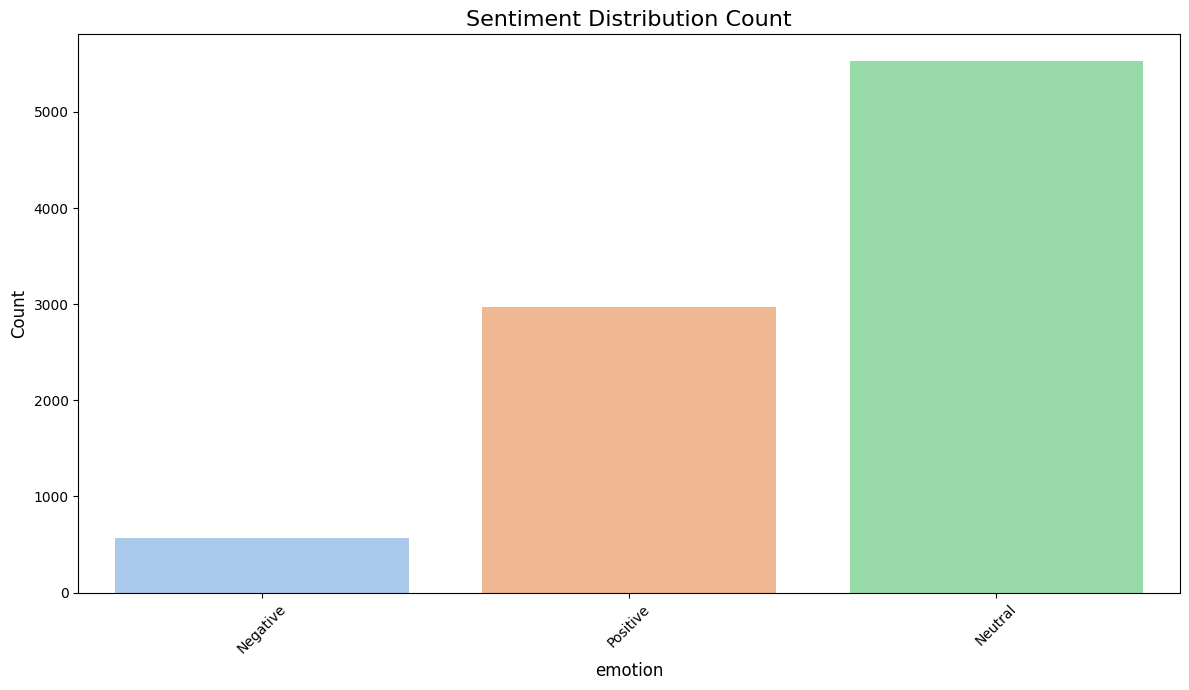

In [26]:
# checking the distribution of  sentiments
percentage = data['emotion'].value_counts(normalize=True)
print(percentage * 100)

# Count plot of the 'emotion' column
plt.figure(figsize=(12, 7))
sns.countplot(x='emotion', data=data, palette='pastel')  # specify x for clarity
plt.title('Sentiment Distribution Count', fontsize=16)
plt.xlabel('emotion', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if they’re long
plt.tight_layout()

plt.savefig("Images/distribution_of_sentiments.png")
plt.show()

#### **Insights**
* Neutral sentiment dominates the dataset, accounting for approximately 61% of the tweets.

* Positive emotions make up around 33%, showing a good level of favorable sentiment.

* Negative sentiments are relatively few at just 6%, suggesting less dissatisfaction overall.

**2. Pie chart: Tweet share by brand**

brand
none      66.205240
Apple     27.102162
Google     6.692598
Name: proportion, dtype: float64


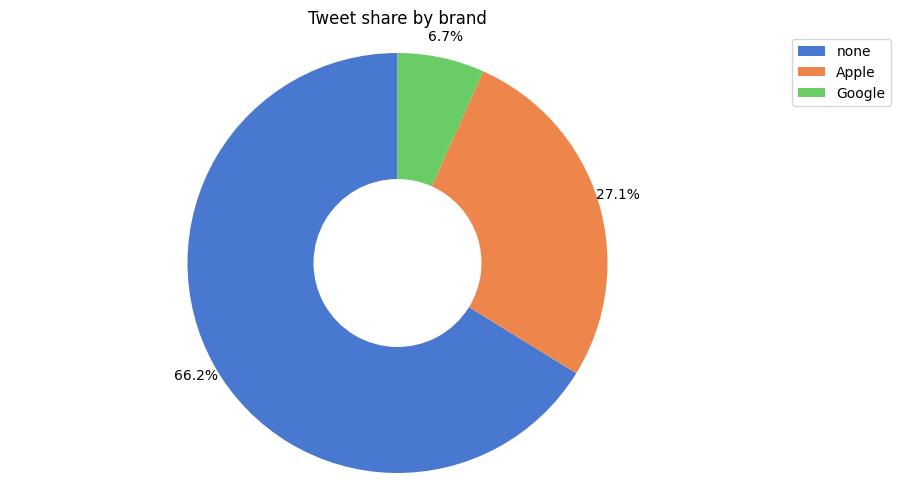

In [27]:
# A pie chart to visualize Tweet share by brand
brand_share = data['brand'].value_counts(normalize=True)
print(brand_share * 100)

# Visualizing using pie chart
plt.figure(figsize=(10, 6))
plt.pie(brand_share.values, autopct='%1.1f%%', pctdistance=1.1, startangle=90, colors=sns.color_palette('muted'), wedgeprops={'width': 0.6})
plt.title('Tweet share by brand')
plt.axis('equal')
plt.legend(labels=brand_share.index, loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig("Images/tweet_share_by_brand.png")
plt.show()

#### **Insights**

* 66.2% of tweets mention no specific brand, indicating a large portion of general discussion or indirect sentiment.

* Apple is the most mentioned brand, making up 27.1% of brand-related tweets, suggesting higher engagement or visibility.

* Google has the least share at 6.7%, indicating fewer tweets directly referencing Google products or services.

**3. Histogram: Tweet length distribution**

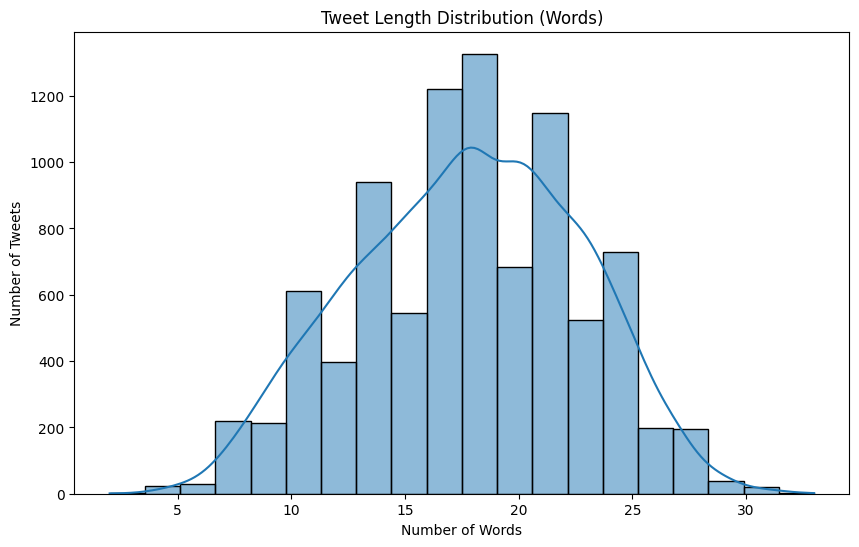

In [28]:
# Count number of words in each tweet (not characters)
data['tweet_length'] = data['tweet_text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(data['tweet_length'], bins=20, kde=True)
plt.title('Tweet Length Distribution (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Tweets')
plt.savefig("Images/tweet_length_distribution.png")
plt.show()

#### **Insights** 

* Most tweets are between 10–15 words.

* The peak tweet length is around 14–15 words.

* The distribution is right-skewed, meaning very short or very long tweets are uncommon.

* This supports the use of standard NLP models without heavy preprocessing for text length.


### **Bivariate analysis**

**1. Emotion vs Brand**

We will plot a bar plot to visualize the distribution of sentiments **'emotion'** relative to the **Brand**

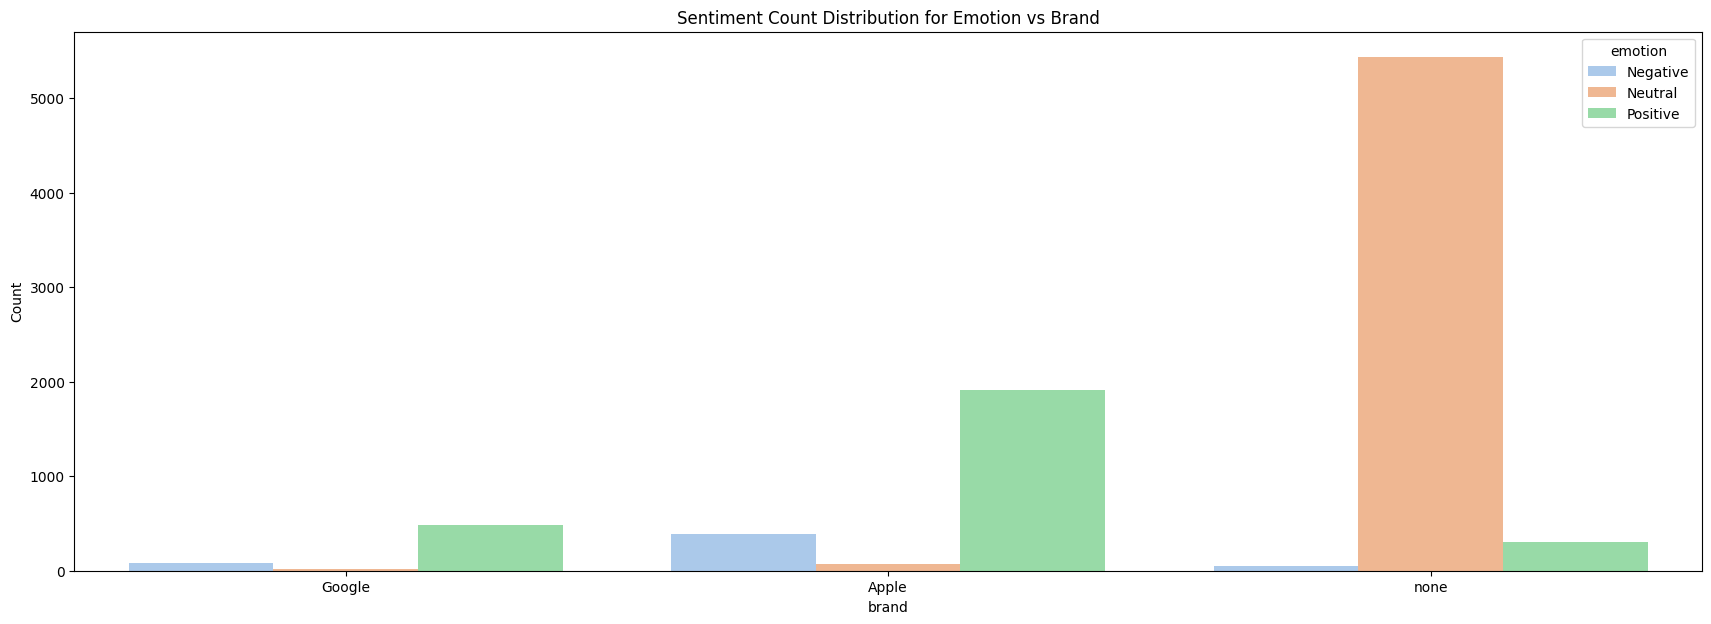

In [29]:
# lets see see sentiment distribution brand-wise
brand_group = data.groupby(['brand','emotion']).size().reset_index(name='count')
# Calculate the ascending order of states based on churn count
ascending_order = brand_group.groupby('brand')['count'].sum().sort_values().index

plt.figure(figsize=(21,7))
sns.barplot(x='brand', y='count', hue='emotion', data=brand_group,palette='pastel', order=ascending_order)
plt.xlabel('brand')
plt.ylabel('Count')
plt.title('Sentiment Count Distribution for Emotion vs Brand')
plt.savefig("Images/sentiment_count_distribution_for_emotion_vs_brand.png")
plt.show()

#### **insights**

The graph shows that Apple received the highest number of positive sentiment tweets compared to Google. This suggests that overall, public perception toward Apple products was more favorable than that of Google during the period covered by the data.

**2. Tweet Length(tweet_text) vs. Emotion**

* Goal: Analyze whether longer tweets tend to be more positive, negative, or neutral.

* Tool: sns.boxplot(x='emotion', y='tweet_length')

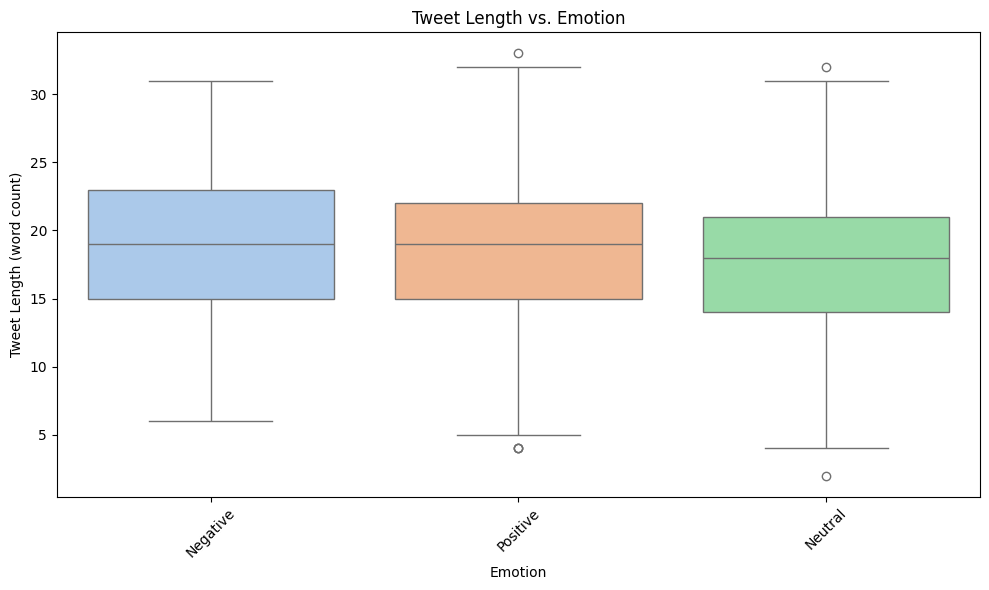

In [30]:
# Ensure tweet_text is a string and calculate tweet length (in words)
data['tweet_length'] = data['tweet_text'].apply(lambda x: len(str(x).split()))

# Plot: Emotion vs. Tweet Length
plt.figure(figsize=(10, 6))
sns.boxplot(x='emotion', y='tweet_length', data=data, palette='pastel')

# Add title and labels
plt.title('Tweet Length vs. Emotion')
plt.xlabel('Emotion')
plt.ylabel('Tweet Length (word count)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Images/tweet_length_vs_emotion.png")
plt.show()

#### **Insights**

* Median tweet length is similar (~12 words) across all sentiment categories.

* Neutral tweets show higher variability and more long-form outliers, possibly reflecting ambiguity or explanation.

* Negative tweets are generally shorter and more direct, suggesting brief expressions of dissatisfaction.

* Positive tweets have a moderate spread with fewer extreme outliers.* 

**3.Brand vs. Sentiment Proportion**

Goal:
To compare how people feel (positive, negative, neutral) about Apple vs. Google.

Method: pd.crosstab(data['brand'], data['emotion'], normalize='index'

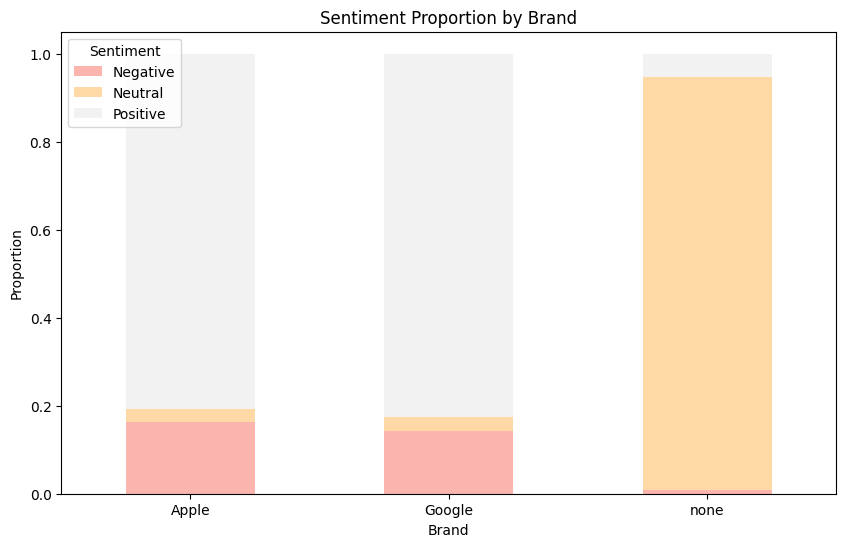

In [31]:


brand_sentiment = pd.crosstab(data['brand'], data['emotion'], normalize='index')
brand_sentiment.plot(kind='bar', stacked=True, colormap='Pastel1', figsize=(10,6))
plt.title("Sentiment Proportion by Brand")
plt.ylabel("Proportion")
plt.xlabel("Brand")
plt.legend(title='Sentiment')
plt.xticks(rotation=0)
plt.savefig("Images/sentiment_proportion_by_brand.png")
plt.show()

#### **Insights**
1. Apple = Mostly Positive
Over 80% of Apple-related tweets are positive , people clearly like talking about Apple.

2. Google Also Positive, but Less
Google tweets are often positive too, but not as much as Apple. The reactions are a bit more mixed.

3. No Brand Mention , Mostly Neutral
Tweets that don’t mention Apple or Google are mostly neutral, users are just making general comments.

4. Some Negativity Exists
About 15% of tweets about both Apple and Google are negative , showing that not everyone is happy with the brands.



## **5. Text_Preprocessing**

#### **Introduction**
In this section, we will perform a series of text preprocessing steps to clean and standardize the tweet data in preparation for modeling. These steps are essential for improving the quality of input data and enhancing the performance of our sentiment classification models.

The preprocessing pipeline includes:

* Converting all tweet text to lowercase

* Removing HTML tags

* Eliminating URLs

* Expanding contractions (e.g., "don't" → "do not")

* Removing punctuation

* Tokenizing the text (splitting into individual words)

* Removing stopwords (common words like "the", "is", etc., that add little meaning)

* Lemmatizing each word to its root form (e.g., "running" → "run")

These steps will help reduce noise in the data and ensure consistent input for training the sentiment analysis models.



In [32]:
# what are the columns?
data.columns

Index(['tweet_text', 'recipient', 'emotion', 'brand', 'tweet_length'], dtype='object')

### **Changing text to lowercase**

We will Convert all text to lowercase which is an essential first step in text preprocessing. It ensures uniformity by treating words like "Apple" and "apple" as the same, avoiding duplication due to case sensitivity.

In [33]:
# normalizing the data to lowercase
data['tweet_text'] = data['tweet_text'].str.lower()
data.head()

,tweet_text,recipient,emotion,brand,tweet_length
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative,Apple,23
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive,Apple,22
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive,Apple,15
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,15
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,Positive,Google,17


#### **Observation**

* Upon reviewing the DataFrame, we can confirm that all the words in the tweet_text column have been successfully converted to lowercase. This ensures consistency in the text data and prevents case-sensitive mismatches during further processing and model training.


### **Removing Html tags and URL**

After converting text to lowercase, the next preprocessing step is to remove HTML tags and URLs, which are often irrelevant to sentiment and add noise to the data.

In [34]:
#Identifying Html tag 
data['tweet_text'][14]

'great #sxsw ipad app from @madebymany: http://tinyurl.com/4nqv92l'

In [35]:
# removing the html tags
def remove_html(review):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', review)

data['tweet_text'] = data['tweet_text'].apply(remove_html)

In [36]:
# removing URL and @ sign
def preprocess_text_removingq_URLand_atsign(text):
    # Remove URLs
    clean_text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r'@[^\s]+', 'user', clean_text)
    # Other preprocessing steps like removing punctuation, converting to lowercase, etc.
    # ...
    return text

data['tweet_text'] = data['tweet_text'].apply(preprocess_text_removingq_URLand_atsign)

In [37]:
#lets confirm the url has been replaced with an empty
data['tweet_text'][14]

'great #sxsw ipad app from user '

In [38]:
#lets view the first five rows in the dataframe 
data.head()

,tweet_text,recipient,emotion,brand,tweet_length
0,.user i have a 3g iphone. after 3 hrs tweeting...,iPhone,Negative,Apple,23
1,user know about user ? awesome ipad/iphone app...,iPad or iPhone App,Positive,Apple,22
2,user can not wait for #ipad 2 also. they shoul...,iPad,Positive,Apple,15
3,user i hope this year's festival isn't as cras...,iPad or iPhone App,Negative,Apple,15
4,user great stuff on fri #sxsw: marissa mayer (...,Google,Positive,Google,17


#### **Observation**
* Our data is looking clean so far. We have successfully removed HTML tags and URLs from the tweets. The sample text **'great #sxsw ipad app from user'** confirms this, as it no longer contains any unnecessary markup or links and also on reviewing the dataframe.

We will now move on to the next preprocessing step, which involves expanding contractions (e.g., converting "can't" to "cannot", "it's" to "it is") to make the text more uniform and machine-readable for sentiment analysis.

### Expanding Contractions 
In this step, we convert abbreviated or contracted words into their full forms. This includes transforming contractions like:

* "can't" → "cannot"

* "it's" → "it is"

* "I'm" → "I am"

In [39]:

# original tweet before expansion
word_before_expansion= data.tweet_text[3]

In [40]:
# import necessarry libraries 
import contractions

# Function to expand contractions in a string
def expand_contractions(text):
    return contractions.fix(text)

# Apply to tweet_text column
data['tweet_text'] = data['tweet_text'].apply(expand_contractions)

In [41]:
## current tweet after expansion
word_after_expansion=data.tweet_text[3]

# Print both for comparison
print("Before Expansion:\n", word_before_expansion)
print()
print("\nAfter Expansion:\n", word_after_expansion)


Before Expansion:
 user i hope this year's festival isn't as crashy as this year's iphone app. #sxsw


After Expansion:
 user i hope this year's festival is not as crashy as this year's iphone app. #sxsw


#### **Observation**

* The contraction "isn't" was correctly expanded to "is not", making the negative sentiment clearer. The possessive "year's" was appropriately left unchanged, preserving the original meaning. Overall, the expansion improved clarity without distorting the sentence.

We will now proceed to remove punctuation from the tweet text to reduce noise and prepare the data for tokenization.

### **Removing Punctuations**

In this step, we remove punctuation marks such as periods, commas, apostrophes, hashtags, and symbols that do not contribute meaningful information for sentiment analysis.

In [42]:
# original tweet before punction
before_punctuation = data.tweet_text[20]
before_punctuation

'need to buy an ipad2 while i am in austin at #sxsw. not sure if i will need to q up at an austin apple store?'

In [43]:
# punctuation
exclude = string.punctuation
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [44]:
# remove punctuations
def remove_punctuations(tweet):
    return tweet.translate(str.maketrans('','',exclude))

In [45]:
# applying our remove_punctuations to the tweet_text
data['tweet_text']=data['tweet_text'].apply(remove_punctuations)
data.head()

,tweet_text,recipient,emotion,brand,tweet_length
0,user i have a 3g iphone after 3 hrs tweeting a...,iPhone,Negative,Apple,23
1,user know about user awesome ipadiphone app t...,iPad or iPhone App,Positive,Apple,22
2,user can not wait for ipad 2 also they should ...,iPad,Positive,Apple,15
3,user i hope this years festival is not as cras...,iPad or iPhone App,Negative,Apple,15
4,user great stuff on fri sxsw marissa mayer goo...,Google,Positive,Google,17


In [46]:
# current  tweet after punctuation
after_punctuation = data.tweet_text[20]


# Printing both for comparison
print("Before Removing Punctuation:\n", before_punctuation)
print("\nAfter Removing Punctuation:\n", after_punctuation)

Before Removing Punctuation:
 need to buy an ipad2 while i am in austin at #sxsw. not sure if i will need to q up at an austin apple store?

After Removing Punctuation:
 need to buy an ipad2 while i am in austin at sxsw not sure if i will need to q up at an austin apple store


#### **Observation**
* The tweet_text column in the DataFrame no longer contains any punctuation. All punctuation marks have been successfully removed, resulting in cleaner and more consistent text for further processing.

* We also inspected a sample tweet using data.tweet_text[20] to verify punctuation removal. Upon review, the tweet contains no punctuation, confirming that the punctuation removal step was successfully applied. Symbols like the hashtag (#) and question mark (?) were removed, while the text content and meaning were preserved. This results in a cleaner version of the tweet, ready for tokenization and further NLP processing.

### **Tokenization and Removing Stopwords**

As the next preprocessing step, we will tokenize the tweet text by breaking it into individual words (tokens). After tokenization, we will remove stopwords—common words like "is", "the", and "and"—that do not add meaningful value to sentiment analysis. This step helps reduce noise and prepares the data for more effective modeling.

In [47]:
# tokenize the tweets
def tokenize_text(tweet):
    return word_tokenize(tweet)

data['tweet_text'] = data['tweet_text'].apply(tokenize_text)
data.head()

,tweet_text,recipient,emotion,brand,tweet_length
0,"[user, i, have, a, 3g, iphone, after, 3, hrs, ...",iPhone,Negative,Apple,23
1,"[user, know, about, user, awesome, ipadiphone,...",iPad or iPhone App,Positive,Apple,22
2,"[user, can, not, wait, for, ipad, 2, also, the...",iPad,Positive,Apple,15
3,"[user, i, hope, this, years, festival, is, not...",iPad or iPhone App,Negative,Apple,15
4,"[user, great, stuff, on, fri, sxsw, marissa, m...",Google,Positive,Google,17


#### **Observation** 

* After applying tokenization to the tweet_text column, each tweet has been successfully broken down into a list of individual words (tokens). The text is now in a structured format, allowing for easier processing and analysis in subsequent steps like stopword removal and lemmatization.

* ####  Removing stopwords after tokenization

In [48]:
# removing stop words
stop_words = set(stopwords.words('english'))

def remove_stopwords(tweet):
    # Use list comprehension for efficient list creation
    new_tweet = [word for word in tweet if word not in stop_words]
    return " ".join(new_tweet)

    # Apply the function to the 'tweet_text' column
data['tweet_text'] = data['tweet_text'].apply(remove_stopwords)
data.head()

,tweet_text,recipient,emotion,brand,tweet_length
0,user 3g iphone 3 hrs tweeting riseaustin dead ...,iPhone,Negative,Apple,23
1,user know user awesome ipadiphone app likely a...,iPad or iPhone App,Positive,Apple,22
2,user wait ipad 2 also sale sxsw,iPad,Positive,Apple,15
3,user hope years festival crashy years iphone a...,iPad or iPhone App,Negative,Apple,15
4,user great stuff fri sxsw marissa mayer google...,Google,Positive,Google,17


#### **Observations** 
* Upon examining the tweet_text column, we observe that stopwords have been successfully removed. Additionally, the text is now represented  as continuous strings rather than individual tokens (words) in list format, indicating that we need to apply re-tokenization again

First we look at the value counts in emotion column

In [49]:
data.emotion.value_counts()

emotion
Neutral     5530
Positive    2970
Negative     569
Name: count, dtype: int64

**Observations** 

From the value counts in the emotion column:

* The majority of tweets (5,530) show no emotion directed at a brand or product.

* Positive emotion is the most common among emotional tweets, with 2,970 entries.

* Negative emotion is significantly less frequent, with only 569 tweets.



This suggests that while most tweets don't express brand-related emotions, positive sentiment dominates among those that do.

Lets look at word distributions in Tweet text

### **Words Distribution in Tweet Text**

We will generate histograms to visualize the word count distribution in tweets for each emotion category, which is excellent for analyzing tweet length patterns across sentiments.

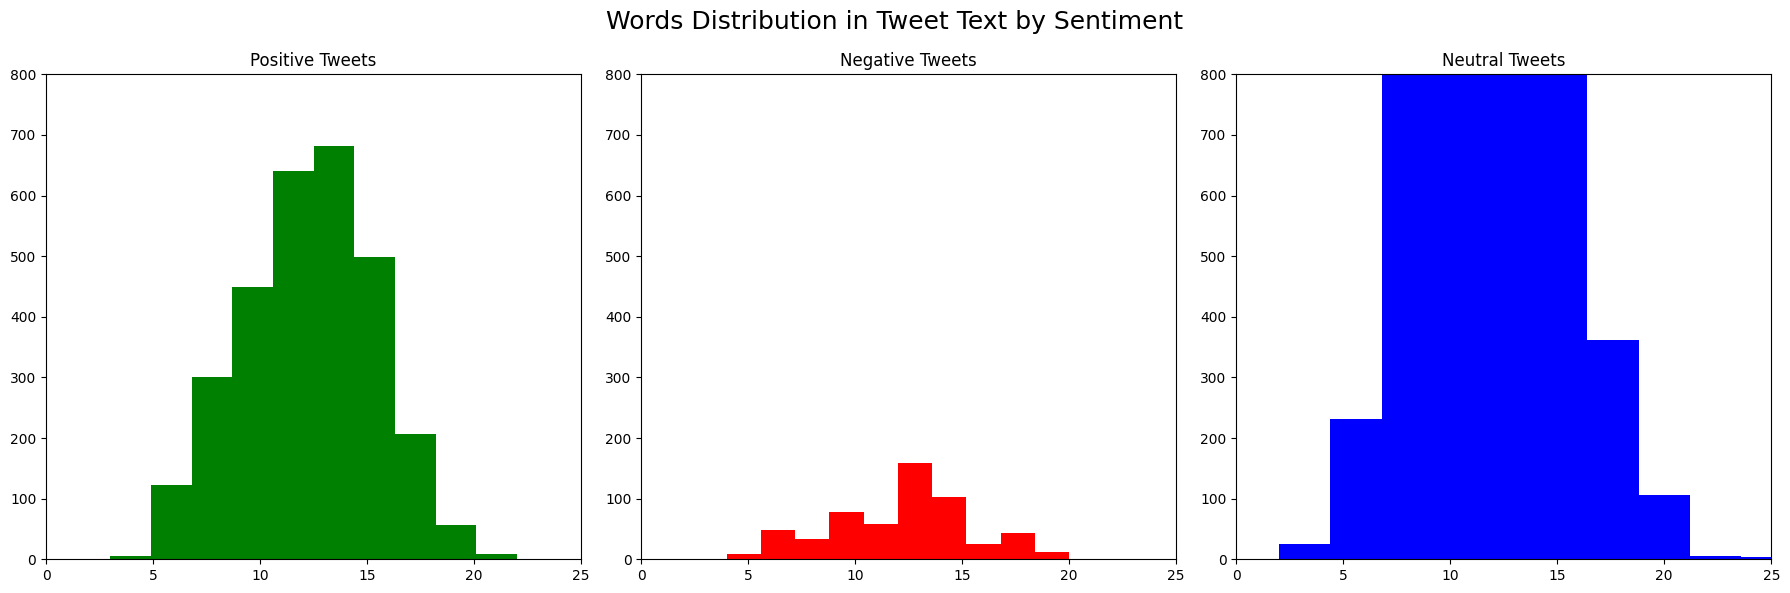

In [50]:
def generate_review_hist_plot(data, label, color, ax):
    tweet_len = data[data['emotion'] == label].tweet_text.str.split().map(lambda x: len(x))
    ax.set_xlim(0, 25)
    ax.set_ylim(0, 800)
    ax.hist(tweet_len, color=color)
    ax.set_title(f'{label} Tweets')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
generate_review_hist_plot(data, 'Positive', 'green', ax[0])
generate_review_hist_plot(data, 'Negative', 'red', ax[1])
generate_review_hist_plot(data, 'Neutral', 'blue', ax[2])

fig.suptitle("Words Distribution in Tweet Text by Sentiment", fontsize=18)
plt.tight_layout()
plt.savefig("Images/words_distribution_in_tweet_by_sentiment.png")
plt.show()

#### **Observations and Interpretation**

* The majority of tweets across all emotion categories fall within the 10 to 15-word range, indicating that users typically express their sentiments in short, concise messages. This pattern is consistent regardless of whether the emotion is positive, negative, neutral, or unclear.



#### **Re-tokenizing**

We observed that after removing stopwords, the text reverted to continuous strings instead of lists of individual tokens. To correct this, we will apply re-tokenization to ensure each tweet is properly split into a list of words, ready for further processing like lemmatization or vectorization. 

In [51]:
# re-tokenizing the data
data['tweet_text'] = data['tweet_text'].apply(tokenize_text)
data.head()

,tweet_text,recipient,emotion,brand,tweet_length
0,"[user, 3g, iphone, 3, hrs, tweeting, riseausti...",iPhone,Negative,Apple,23
1,"[user, know, user, awesome, ipadiphone, app, l...",iPad or iPhone App,Positive,Apple,22
2,"[user, wait, ipad, 2, also, sale, sxsw]",iPad,Positive,Apple,15
3,"[user, hope, years, festival, crashy, years, i...",iPad or iPhone App,Negative,Apple,15
4,"[user, great, stuff, fri, sxsw, marissa, mayer...",Google,Positive,Google,17


In [52]:
#viewing the first index of the text
data.tweet_text[0]

['user',
 '3g',
 'iphone',
 '3',
 'hrs',
 'tweeting',
 'riseaustin',
 'dead',
 'need',
 'upgrade',
 'plugin',
 'stations',
 'sxsw']

#### **Observation**
The tweet at index 0 is now a list of tokens, which confirms that tokenization has been successfully applied. This format is ideal for further steps like lemmatization and vectorization.

#### **Justification for Retokenizing**

We retokinized since after removing the stopwords the tweets were no longer split as strings.

### **Frequency Distribution after Removing Stopwords**

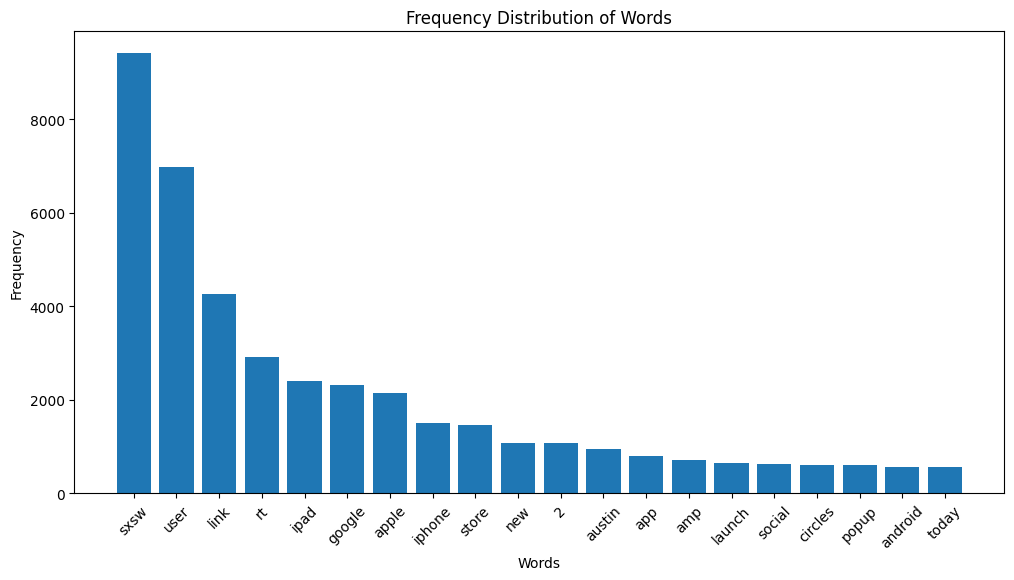

In [53]:
tweet_texts = data.tweet_text
# Flatten the list of tokens into a single list
all_tokens = [tweet for sublist in tweet_texts for tweet in sublist]

# Create the frequency distribution
freq_dist = FreqDist(all_tokens)

# Get the most common words
most_common = freq_dist.most_common(20)  # Example: Top 20 most common words

# Extract the words and frequencies
words, frequencies = zip(*most_common)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Words')
plt.xticks(rotation=45)
plt.savefig("Images/frequency_distribution_of_words.png")
plt.show()

#### **Observation**

Just by looking at this, we can see there is a high occurence of

* Venue (south by south west) specific words such as sxsw

* Twitter specific words(re-tweet such as rt

* Brand or product specific words such as iphone

What we decipher from this in terms of sentiments:

* Almost all of the most frequent terms are neutral in terms of sentiment, as they are mostly product/event/brand-specific keywords.

* The word “new” and “social” show slight positive connotations, implying some optimism or engagement around newness and social interaction.This indicates that the conversation or text is mostly informational and brand/product-driven, rather than emotionally charged. Positive tones only slightly emerge with concepts like “new” or “social,” suggesting interest in innovation or community.

These words probably occur across our various sentiments and may not necessarily add any meaning, unless a majority of their occurence is associated with a particular emotion


#### **Word Cloud representation**

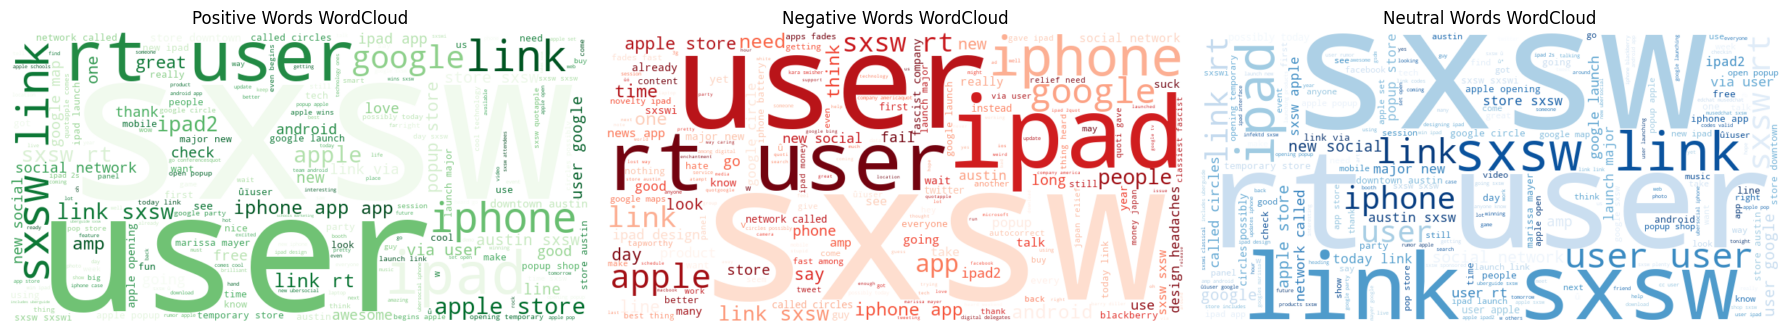

In [54]:
# Recombine tokens into full strings per sentiment
positive_text = " ".join(" ".join(tweet) for tweet in data[data['emotion'] == 'Positive']['tweet_text'])
negative_text = " ".join(" ".join(tweet) for tweet in data[data['emotion'] == 'Negative']['tweet_text'])
neutral_text  = " ".join(" ".join(tweet) for tweet in data[data['emotion'] == 'Neutral']['tweet_text'])

# Generate word clouds
positive_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
negative_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)
neutral_wc  = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(neutral_text)

# Plot side-by-side
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Words WordCloud')

plt.subplot(1, 3, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Words WordCloud')

plt.subplot(1, 3, 3)
plt.imshow(neutral_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Words WordCloud')

plt.tight_layout()
plt.savefig("Images/emotions_words_wordcloud.png")
plt.show()


The word cloud highlights predominant tokens indicative of positive,negative and neutral sentiments. Notably, the SXSW event features prominently in the three categories. Among negative emotions, the token "iPad design" stands out, indicating a specific area of dissatisfaction or critique.

### **Lemmatization** 

Next, we apply lemmatization to reduce each word to its base form. This helps group similar words together and improves the model’s understanding of the text.

In [55]:
# lemmatization - example cats - cat
# instantiate a Lemmatizer
word_lem = WordNetLemmatizer()

# function
def lem_words(tweet):
    return [word_lem.lemmatize(word) for word in tweet]

In [56]:
## Applying to tweet_text
data['tweet_text'] = data['tweet_text'].apply(lem_words)
data['tweet_text'].head()

0    [user, 3g, iphone, 3, hr, tweeting, riseaustin...
1    [user, know, user, awesome, ipadiphone, app, l...
2              [user, wait, ipad, 2, also, sale, sxsw]
3    [user, hope, year, festival, crashy, year, iph...
4    [user, great, stuff, fri, sxsw, marissa, mayer...
Name: tweet_text, dtype: object

In [57]:
# the first five
data.head()

,tweet_text,recipient,emotion,brand,tweet_length
0,"[user, 3g, iphone, 3, hr, tweeting, riseaustin...",iPhone,Negative,Apple,23
1,"[user, know, user, awesome, ipadiphone, app, l...",iPad or iPhone App,Positive,Apple,22
2,"[user, wait, ipad, 2, also, sale, sxsw]",iPad,Positive,Apple,15
3,"[user, hope, year, festival, crashy, year, iph...",iPad or iPhone App,Negative,Apple,15
4,"[user, great, stuff, fri, sxsw, marissa, mayer...",Google,Positive,Google,17


#### **Observation**
* The tweets are now shown as lists of lemmatized words, meaning each word has been reduced to its base or root form (e.g., "tweeting" → "tweet", "crashy" likely remains as-is if not found in the lemmatizer dictionary).

* The text appears clean, lowercase, and free of punctuation, indicating successful preprocessing.

* Lemmatization has helped standardize word forms, which will improve model consistency during training and prediction.

* This shows the data is now well-prepared for vectorization and modeling.

### **Dealing with Emojis**

As part of preprocessing, we will handle emojis by replacing them with their corresponding text meanings eg (a smiling emoji with a "smiling_face"word). This helps preserve the emotional context carried by emojis, which is valuable for sentiment analysis.

In [58]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [59]:
#function to remove emojis and sequence of letters like heeeey)
def process(tweets):
    
    processed_tweet = []
    
    
    # Defining regex patterns.
    
    sequencePattern   = r"(.)\1\1+" #matches three or more consecutive occurrences of the same character.
    seqReplacePattern = r"\1\1"
    
    for tweet in tweets:
        
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])              
            # Replace 3 or more consecutive letters by 2 letter.
            tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        
        processed_tweet.append(tweet)
        
    return processed_tweet

In [60]:
data['tweet_text'] = data['tweet_text'].apply(process)
data.head()

,tweet_text,recipient,emotion,brand,tweet_length
0,"[user, 3g, iphone, 3, hr, tweeting, riseaustin...",iPhone,Negative,Apple,23
1,"[user, know, user, awesome, ipadiphone, app, l...",iPad or iPhone App,Positive,Apple,22
2,"[user, wait, ipad, 2, also, sale, sxsw]",iPad,Positive,Apple,15
3,"[user, hope, year, festival, crashy, year, iph...",iPad or iPhone App,Negative,Apple,15
4,"[user, great, stuff, fri, sxsw, marissa, mayer...",Google,Positive,Google,17


In [61]:
data.tweet_text[0]

['user',
 '3g',
 'iphone',
 '3',
 'hr',
 'tweeting',
 'riseaustin',
 'dead',
 'need',
 'upgrade',
 'plugin',
 'station',
 'sxsw']

#### **Observations**
 After applying emoji removal or replacement, the tweet remains clean and consists solely of meaningful, lowercased tokens. In this specific case:

 ['user', '3g', 'iphone', '3', 'hr', 'tweeting', 'riseaustin', 'dead', 'need', 'upgrade', 'plugin', 'station', 'sxsw']

 * No emoticons or Unicode emojis are present, indicating that either the tweet originally contained none or they were successfully removed or replaced.

* The tweet retains its semantic value (e.g., words like “dead”, “need”, “upgrade” still suggest negative sentiment), ready for vectorization and model input.

This confirms that the emoji handling step has been successfully applied, and no residual emoji symbols remain in the text.

### **vectorization**

#### **CountVectorization**

As the next step in preprocessing, we will apply CountVectorizer to convert the cleaned and tokenized tweet text into numerical feature vectors. This transformation allows the text data to be used as input for machine learning models by representing each tweet based on the frequency of words it contains.

In [62]:
# create instance 1 vectorizer
bow = CountVectorizer()
#create lemmatized_review column 
data['lemmatized_review'] = data['tweet_text'].str.join(" ")
x = bow.fit_transform(data['lemmatized_review'])

In [63]:
#checking feature names 
feature_name = bow.get_feature_names_out()
feature_name

array(['02', '03', '0310', ..., 'ûómy', 'ûóthe', 'ûóuser'], dtype=object)

#### **Observations**

* The output shows a vocabulary array generated by CountVectorizer, containing 9,869 unique tokens (words or word-like elements) extracted from the tweet text.




## **Feature engineering**

#### **Label Encoding the Target**

Here we label encode the target feature to transform the values to numerical values.

In [64]:
#instantiate labelencoder
le = LabelEncoder() # initializing the lib
#fit transform 
data['emotion_code'] = le.fit_transform(data.emotion)
le.classes_ # viewing the classes

array(['Negative', 'Neutral', 'Positive'], dtype=object)

#### **Previewing Encoded Labels**

To confirm that label encoding was applied correctly, you can preview a few rows from the relevant columns:

In [65]:
# preview
data.head()

,tweet_text,recipient,emotion,brand,tweet_length,lemmatized_review,emotion_code
0,"[user, 3g, iphone, 3, hr, tweeting, riseaustin...",iPhone,Negative,Apple,23,user 3g iphone 3 hr tweeting riseaustin dead n...,0
1,"[user, know, user, awesome, ipadiphone, app, l...",iPad or iPhone App,Positive,Apple,22,user know user awesome ipadiphone app likely a...,2
2,"[user, wait, ipad, 2, also, sale, sxsw]",iPad,Positive,Apple,15,user wait ipad 2 also sale sxsw,2
3,"[user, hope, year, festival, crashy, year, iph...",iPad or iPhone App,Negative,Apple,15,user hope year festival crashy year iphone app...,0
4,"[user, great, stuff, fri, sxsw, marissa, mayer...",Google,Positive,Google,17,user great stuff fri sxsw marissa mayer google...,2


In [66]:
# displaying the encoding scheme
data[['emotion', 'emotion_code']].head(10)

,emotion,emotion_code
0,Negative,0
1,Positive,2
2,Positive,2
3,Negative,0
4,Positive,2
5,Neutral,1
7,Positive,2
8,Positive,2
9,Positive,2
10,Positive,2


#### **Observations**
* Emotions were successfully converted to numbers.(negative :1, positive :2, neutral: 1). This shows label encoding has been done

* Encoding is consistent across all rows.

* No missing values in the encoded column.

* Now ready for use in model training.

## 6. **Modelling**

The task is a classification problem, aiming to predict the sentiment of tweets.

**Models to be Explored:**
* Binary Logistic Regression

For classifying tweets as positive or negative

* Multiclass XGBoost Model

To include positive, negative, and neutral classes

* Multinomial Naive Bayes (MultinomialNB)

Suitable for text data and multiclass classification

**Evaluation Metric:**
Accuracy will be used to evaluate model performance.

It will reflects how often the model correctly classifies tweet sentiment.

**Justification:**
Accuracy provides a straightforward measure to judge whether a tweet is positive or negative effectively.

**Target Benchmark:**
A minimum accuracy of 70% will be considered a successful model.










### **6.1 Binary classification**

* In this section we create a base model to identify if a tweet is 'Positive' or 'Negative'.

* LogisticRegression will be used for the classification.

* The normal preprocessing of vectorization and train test split will be implemented.

In [67]:
# creating a copy of the original data so as to remove unwanted rows i.e. (not positive or negative)
data_copy = data.copy()

In [68]:
data_copy.head()

,tweet_text,recipient,emotion,brand,tweet_length,lemmatized_review,emotion_code
0,"[user, 3g, iphone, 3, hr, tweeting, riseaustin...",iPhone,Negative,Apple,23,user 3g iphone 3 hr tweeting riseaustin dead n...,0
1,"[user, know, user, awesome, ipadiphone, app, l...",iPad or iPhone App,Positive,Apple,22,user know user awesome ipadiphone app likely a...,2
2,"[user, wait, ipad, 2, also, sale, sxsw]",iPad,Positive,Apple,15,user wait ipad 2 also sale sxsw,2
3,"[user, hope, year, festival, crashy, year, iph...",iPad or iPhone App,Negative,Apple,15,user hope year festival crashy year iphone app...,0
4,"[user, great, stuff, fri, sxsw, marissa, mayer...",Google,Positive,Google,17,user great stuff fri sxsw marissa mayer google...,2


In [69]:
# Define the values to drop
values_to_drop = [1]

# Drop rows that have the values in column 'B'
data_copy = data_copy[~data_copy['emotion_code'].isin(values_to_drop)]

In [70]:
# value counts
data_copy['emotion_code'].value_counts()

emotion_code
2    2970
0     569
Name: count, dtype: int64

Lets visualize the binary sentiment distribution emotion-wise for more clarity and understanding

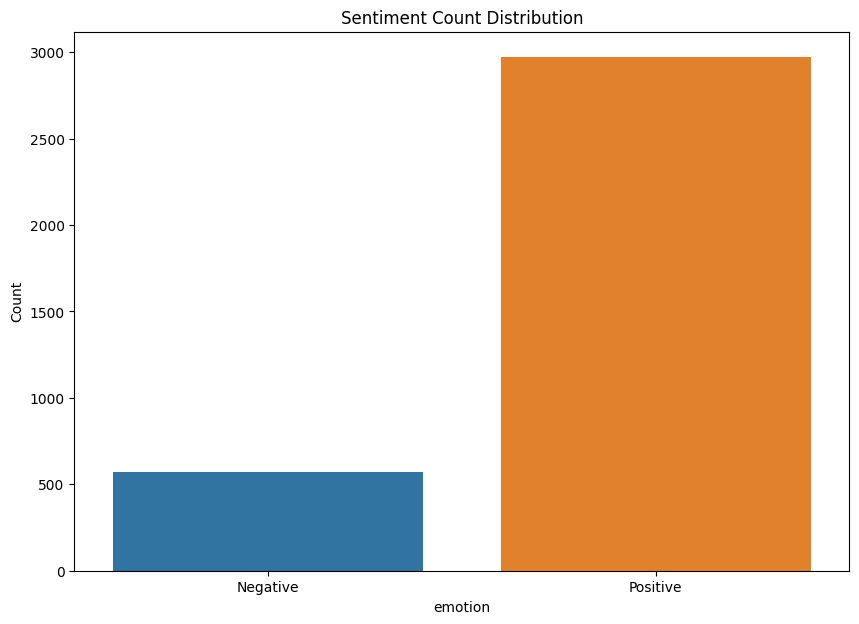

In [71]:
# lets see see binary sentiment distribution emotion-wise
emotion_group = data_copy.groupby('emotion')['emotion_code'].value_counts().reset_index(name='count')
# Calculate the ascending order of states based on churn count
ascending_order = emotion_group.groupby('emotion')['count'].sum().sort_values().index

plt.figure(figsize=(10,7))
sns.barplot(x='emotion', y='count', hue='emotion', data=emotion_group, order=ascending_order)
plt.xlabel('emotion')
plt.ylabel('Count')
plt.title('Sentiment Count Distribution')
plt.savefig("Images/sentiment_count_distribution.png")
plt.show()

#### **Intepretation**

* From the graph above, it is evident that positive sentiment was the most common among the tweets, indicating an overall favorable public perception toward the brands or products discussed.

* Negative emotion tweets are significantly fewer, showing less dissatisfaction compared to positivity.

* The dataset is imbalanced, with a noticeable skew toward positive sentiments.Something to consider during model training.

### **Vectorizing Data Copy**

**CountVectorizer**

To prepare the tweet text for modeling, we now apply CountVectorizer to transform the cleaned text into numerical feature vectors.

In [72]:
# create instance of vectorizer
bow2 = CountVectorizer()
data_copy['lemmatized_review'] = data_copy['tweet_text'].str.join(" ")
# our X
x2 = bow2.fit_transform(data_copy['lemmatized_review'])

In [73]:
# preview
data_copy.head()

,tweet_text,recipient,emotion,brand,tweet_length,lemmatized_review,emotion_code
0,"[user, 3g, iphone, 3, hr, tweeting, riseaustin...",iPhone,Negative,Apple,23,user 3g iphone 3 hr tweeting riseaustin dead n...,0
1,"[user, know, user, awesome, ipadiphone, app, l...",iPad or iPhone App,Positive,Apple,22,user know user awesome ipadiphone app likely a...,2
2,"[user, wait, ipad, 2, also, sale, sxsw]",iPad,Positive,Apple,15,user wait ipad 2 also sale sxsw,2
3,"[user, hope, year, festival, crashy, year, iph...",iPad or iPhone App,Negative,Apple,15,user hope year festival crashy year iphone app...,0
4,"[user, great, stuff, fri, sxsw, marissa, mayer...",Google,Positive,Google,17,user great stuff fri sxsw marissa mayer google...,2


#### **Observation** 

From the transformed dataframe, it is clear that CountVectorization has been successfully applied — the tweet text has been converted into a numerical matrix suitable for model training.

### **Train-Test Split**

We will now split the dataset into training and testing sets.
This allows us to:

* Train the model on one portion of the data

* Evaluate it on unseen data to check generalization performance

In [74]:
#x = bow.fit_transform(data['lemmatized_review'])
# our y
y = data_copy['emotion_code']

In [75]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=42)

In [76]:
# confirming shape

X_train.shape, y_train.shape

((2831, 5872), (2831,))

#### **Interpretations of the shapes after train-test split**

* X_train shape: (2831, 5872) : 2831 tweets, each represented by 5872 unique features (words)

* y_train shape: (2831,) : 2831 sentiment labels (1D array)

#### **Fitting logistic regression model on split data**

After splitting the data, we now train a Logistic Regression model — suitable for binary classification tasks (e.g., positive vs. negative sentiment).

In [77]:
# instantiating model 1
log_reg = LogisticRegression(random_state=42)

In [78]:
# fitting
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [79]:
# predicting
y_pred = log_reg.predict(X_test)
y_train_pred = log_reg.predict(X_train)

#### **Evaluation**

After training the logistic regression model, we now evaluate its performance on the test data to measure how well it generalizes to unseen tweets.
Here we will use: 
* Accuracy to show proportion of correct predictions

* Confusion Matrix to show true vs. predicted labels

* Precision, Recall, F1-score  for deeper insight, especially with imbalanced classes


In [80]:
#Accuracy score
print('train',accuracy_score(y_train, y_train_pred))
print('test',accuracy_score(y_test, y_pred))

train 0.9703285058283292
test 0.902542372881356


 #### **Interpretation:**

1. High training accuracy indicates the model learned well from the training data.

2. Strong test accuracy (above your 70% benchmark) shows the model generalizes well to unseen tweets.

3. The small gap between training and test accuracy suggests:

      * No significant overfitting

      * Model is stable and reliable on both seen and unseen data



Let us see the classification metric report for further deeper insights


In [81]:
# Classification metric Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.44      0.58       106
           2       0.91      0.98      0.94       602

    accuracy                           0.90       708
   macro avg       0.87      0.71      0.76       708
weighted avg       0.90      0.90      0.89       708



#### **Interpretations**

1. **Precision**
* When the model predicts a tweet as negative or positive, it's correct 82% and 91% of the time respectively.

2. **Recall**
* The model correctly identifies 98% of actual positives, but only 44% of actual negatives — low recall for class 1.

3. **F1-score**
* Harmonic mean of precision & recall. Indicates strong positive sentiment detection, but weaker for negative.


In [82]:
#Confusion Matrix 
confusion_matrix = confusion_matrix(y_test, y_pred)

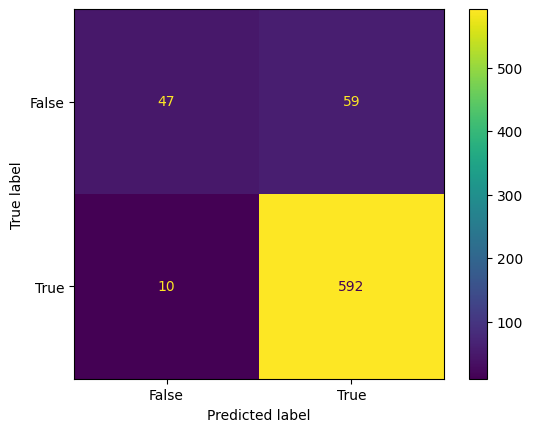

In [83]:
#Display Confusion Matrix 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.savefig("Images/confusion_matrix.png")
plt.show()

#### **Interpretation**


* **592 True Positives:** Model correctly predicted most positive sentiments.


* **59 False Positives:** Many negative tweets misclassified as positive.


* **10 False Negatives:** A few positive tweets were misclassified as negative.


* **47 True Negatives:** Some negative tweets were correctly classified.

#### **Inferences**
* The model is strong at identifying positive sentiment.

* It struggles with detecting negative sentiment — consistent with the earlier low recall (0.44) for the negative class.

* This confirms the class imbalance issue, where the model favors the more frequent (positive) class.


## **Machine Learning Communication**

#### **Rationale why modeling was implemented.**

* While simpler forms of data analysis, such as descriptive statistics or basic data visualization, can provide initial insights, they may not be sufficient for complex problems or large datasets. Machine learning leverages advanced algorithms to uncover hidden patterns.

#### **Results.**
      
* Training accuracy: 97%
      
* Testing accuracy: 90%



* The accuracy means that the model can predict with an accuracy of 90% whether a tweet is positive or negative.
* The current model is fit for prediction since it is generalizing well to new data even with high accuracy.

### **Limitations of binary model.**

* Not suitable for datasets with more than two sentiment classes (e.g., neutral, unclear).

* Sensitive to class imbalance — may favor majority class.

* Misses nuanced insights needed for real-world decision-making.

* Cannot accurately handle "I can't tell" or neutral sentiments.

In this case we will consider multiclass models for more comprehensive sentiment analysis.

#### **Testing Logistic Regression Model here**

* We take a sample sentence, preprocess it then pass it to the model to see the output.

In [84]:
# tweet
review = 'Awwww!! the google was sooo sweeet!! I loved it'
#review = 'i hate apple'

In [85]:
# lowercase
review = review.lower()
review

'awwww!! the google was sooo sweeet!! i loved it'

In [86]:
# removing punctuations
review = remove_punctuations(review)
review

'awwww the google was sooo sweeet i loved it'

In [87]:
# tokenizing the data
review = tokenize_text(review)
review

['awwww', 'the', 'google', 'was', 'sooo', 'sweeet', 'i', 'loved', 'it']

In [88]:
# removing stopwords
review = remove_stopwords(review)
review

'awwww google sooo sweeet loved'

In [89]:
review = tokenize_text(review)
review

['awwww', 'google', 'sooo', 'sweeet', 'loved']

In [90]:
# lemmatization
review = lem_words(review)
review

['awwww', 'google', 'sooo', 'sweeet', 'loved']

In [91]:
# joining to one sentence
review = ' '.join(review)

review

'awwww google sooo sweeet loved'

In [92]:
# putting to list
review = [review]
review

['awwww google sooo sweeet loved']

In [93]:
# vectorizing
review_x = bow2.transform(review)
review_x

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2 stored elements and shape (1, 5872)>

In [94]:
test_predict = log_reg.predict(review_x)
test_predict

array([2])

## **2. Using Decision Trees in Binary Classification**

After exploring Linear Regression as a baseline model for binary classification, the next step is to try Decision Trees. Unlike Linear Regression, which assumes a linear relationship between features and the target, Decision Trees can capture non‑linear patterns by recursively splitting the data into increasingly homogeneous subsets. This makes them a powerful and interpretable method for binary classification tasks.

In [95]:
#Data preparation
data_copy['lemmatized_review'] = data_copy['tweet_text'].str.join(" ")

X =data_copy['lemmatized_review']
y = data_copy['emotion_code']


In [96]:
#Text vectorization
#instatiate the model count vectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [97]:
#Train-test-split
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42
)

In [98]:
#Training  Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [99]:
# Evaluation 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = dt_model.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.49      0.54       106
           2       0.91      0.94      0.93       602

    accuracy                           0.87       708
   macro avg       0.75      0.72      0.73       708
weighted avg       0.86      0.87      0.87       708

Confusion Matrix:
[[ 52  54]
 [ 36 566]]


In [100]:
print("Confusion Matrix:")
confusion_matrix = confusion_matrix(y_test, y_pred)

Confusion Matrix:


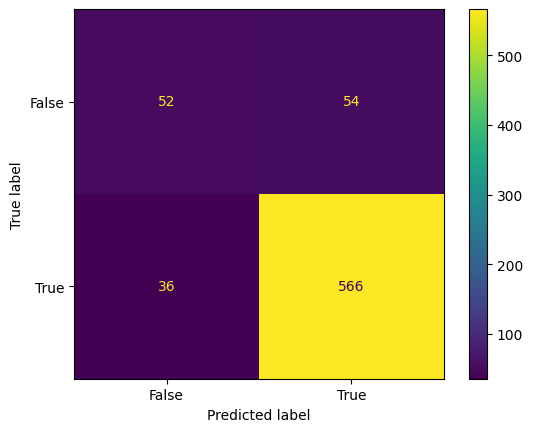

In [101]:
#Display Confusion Matrix 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.savefig("Images/confusion_matrix.png")
plt.show()

In [102]:
#Accuracy of the Decision Tree

# Predict on train and test sets
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display results
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 1.00
Test Accuracy: 0.87


#### **Insights from Decision Tree Model**

* Accuracy: Achieved 87%, which is relatively high, but this is primarily due to strong performance on the majority class.

**Class Imbalance Impact:**
* The model performs significantly better on class 2 (Positive sentiment) than on class 0 (Negative sentiment).

* F1-score for class 2: 0.93

* F1-score for class 0: 0.54

This indicates the model is biased toward the dominant class and struggles with minority class detection.

**Precision and Recall Breakdown:**

Class 0 (Negative):

* Precision: 0.59

* Recall: 0.49
T
he model misclassifies many negatives as positives, leading to a high false positive rate.

Class 2 (Positive):

* Precision: 0.91

* Recall: 0.94
Strong performance in both correctly identifying and labeling positive sentiments.


## **Machine Learning Communication**

#### **Rationale why modeling was implemented.**

The Decision Tree model was implemented as an interpretable baseline to classify tweet sentiments. It visually represents decision paths, making it easy to understand how text features influence sentiment predictions. Although simpler than advanced models like XGBoost, Decision Trees help evaluate how well basic rules can separate positive and negative sentiments in the dataset.

#### **Results.**
      
* Training accuracy: 100%
      
* Testing accuracy: 87%



 * Training Accuracy: 100%
Model fits training data perfectly – this indicates overfitting.

* Testing Accuracy: 87%
 Still decent generalization, but a 13% drop suggests it struggles with unseen data.

#### **Limitations**
* Overfitting – Perfect on training data (100%) but less accurate on test data (87%), showing poor generalization.

* Class Imbalance Bias – Performs well on the majority class but poorly detects the minority (negative sentiment).

* Instability – Sensitive to small data changes, leading to inconsistent model structure and performance.



#### **Pruning a Decision tree**

In [103]:
# Create and fit a pruned Decision Tree
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
model.fit(X_train, y_train)

# Predictions on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))



Train Accuracy: 0.8481102084069233
Test Accuracy: 0.8573446327683616


#### **Interpretation:**
* The training accuracy dropped slightly from 100% (pre-pruning) to 84.8%, which is expected—pruning simplifies the model and reduces overfitting.

* The test accuracy remained stable (previously 87%, now 85.7%) — a small decrease, but this often indicates better generalization.

Conclusion:

Pruning helped to reduce overfitting, making the model more generalizable. Although test accuracy decreased slightly, the model is now more reliable on unseen data.

#### **2. Class Weights to Handle Imbalance**

In [104]:
dt_model_weighted = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model_weighted.fit(X_train, y_train)

# Evaluate
# Predictions
y_train_pred = dt_model_weighted.predict(X_train)
y_test_pred = dt_model_weighted.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9996
Test Accuracy: 0.7980


#### **Interpretation** 
 Train Accuracy: 99.96% vs Test Accuracy: 79.80% shows clear overfitting — the model performs well on training data but poorly on unseen data.

**Key Insight:**
Model is too complex and memorized training data instead of learning patterns.

In [105]:
from sklearn.ensemble import RandomForestClassifier

#### **Random Forest**

In [106]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Train Accuracy: 0.9996467679265277
Test Accuracy: 0.8912429378531074


**Random Forest Evaluation**
* Train Accuracy: 99.96% — very high, suggests overfitting (model memorizing training data).

* Test Accuracy: 89.12% — good generalization, better than Decision Tree after pruning.

**Insights**
* Improvement over Decision Tree: Test accuracy improved from 85.7% to 89.1%.

* Overfitting Risk: The near-perfect train score means the model may not generalize as well on truly unseen data.

* Class Balance: If your classes (e.g. Positive vs. Negative) are imbalanced, the high test accuracy might be biased toward the majority class.



#### **Model Tuning using GridSearchCV**

This section demonstrates how hyperparameter tuning is performed for machine learning models using GridSearchCV in Scikit-learn. Below are two examples: one for Random Forest and another for Decision Tree classifiers.

#### **1. Random Forest Tuning with GridSearchCV**

In [107]:
from sklearn.model_selection import GridSearchCV


In [108]:
# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best model and parameters
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Evaluate on test data
from sklearn.metrics import accuracy_score
y_pred = best_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits


c:\Users\Administrator\.conda\envs\DataScience_env\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy: 0.8657709048534848
Test Accuracy: 0.8912429378531074


**Performance:**

* Best CV Accuracy: 86.57% – shows consistent performance during cross-validation

* Test Accuracy: 89.12% – strong generalization to unseen data

 **Findings**

Grid search improved tuning by:

Reducing potential overfitting via better hyperparameters

Increasing test accuracy compared to defaults or manually chosen settings

#### **Models Performances** 

* Logistic Regression:  Best overall — 90% test accuracy, balanced and generalizes well.

* Random Forest (GridSearch):  Very strong — 89.1% accuracy, handles complex data patterns.

* Decision Tree (Unpruned):  High train, lower test — 100% train, 87% test → overfits.

* Pruned Decision Tree:  More balanced — 85% train, 86% test → less overfitting.

* Weighted Model:  Helps class balance — but drops test accuracy to ~79.8%.


### **Visualizations of models that were used for binary classifications and their performance**

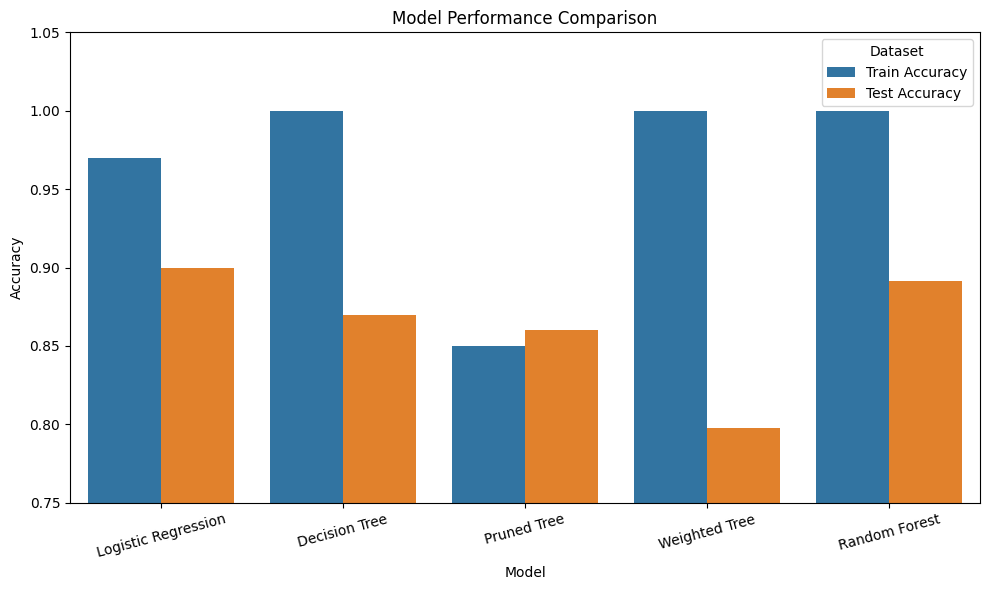

In [109]:
# Sample performance data
model_names = ['Logistic Regression', 'Decision Tree', 'Pruned Tree', 'Weighted Tree', 'Random Forest']
train_accuracy = [0.97, 1.00, 0.85, 0.9996, 0.9996]
test_accuracy = [0.90, 0.87, 0.86, 0.7980, 0.8912]

# Create a DataFrame
df = pd.DataFrame({
    'Model': model_names,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy
})

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars='Model', var_name='Dataset', value_name='Accuracy')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Model', y='Accuracy', hue='Dataset')
plt.title('Model Performance Comparison')
plt.ylim(0.75, 1.05)
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig("Images/model_performance_comparison_binary_class.png")
plt.show()

**Result**
* This bar chart shows the train vs test accuracy for each model.

* Helps visually assess overfitting, generalization, and model reliability.

Despite trying advanced models and parameter tuning, Logistic Regression remains the best for your task — simple, interpretable, and effective.

## **6.2 Multiclass Classifier**

Now shifting from binary to multiclass sentiment classification, we’ll work with the original dataset to detect:

* Positive emotion

* Negative emotion

* No emotion

* I can’t tell

#### **Models to Be Tested:**
* Multinomial Naive Bayes (MultinomialNB)

Best for text classification with word counts or frequencies.

* XGBoost (Extreme Gradient Boosting)

A powerful, scalable model ideal for structured data and multiclass problems.

#### **Goal:**

Build and evaluate models that can classify tweets into more than two sentiment classes for a richer understanding of public opinion.

#### **MultinomialNB model**

In [110]:
# target variable
y = data['emotion_code']

In [111]:
# splitting the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(x, y, test_size=0.2, random_state=42)

In [112]:
X_train_multi.shape, y_train_multi.shape

((7255, 9869), (7255,))

#### **Interpreting the shape of the Multiclass training Data**

1. Features (X_train) shape: (7255, 9869) 256 tweets, each represented by a vector of 9870 unique tokens (from CountVectorizer)

2. Target (y_train) shape: (7255,) One sentiment label per tweet, covering all 4 classes:

* Positive 

* Negative 

* Neutral


Lets instantiate the model 





In [113]:
# instatiating the multi class model
multi_class = MultinomialNB()
# fitting the model
multi_class.fit(X_train_multi, y_train_multi)

MultinomialNB()

In [114]:
# predicting multi-class
y_pred_multi = multi_class.predict(X_test_multi)
y_train_pred_multi = multi_class.predict(X_train_multi)

In [115]:
# checking the accuracy
print('train',accuracy_score(y_train_multi, y_train_pred_multi))
print('test',accuracy_score(y_test_multi, y_pred_multi))

train 0.8173673328738801
test 0.6797133406835723


#### **Interpretation**
1. The model learned patterns in the training data reasonably well.

2. Drop in test accuracy suggests:

* Possible overfitting (model performs better on training than unseen data)



### **Machine Learning Communication - MultiNomialmodel.**

#### **Rationale why MultiNomial modeling was implemented.**

* While simpler forms of modeling can do , they may not be able to work with multi-class datasets.

#### **Results.**
* Accuracy on the training set: 82%

* Accuracy on the testing set: 68%

* The model is overfitting

#### **Limitations of multinomial model.**
* The current model is not fit for prediction since it is not generalizing well to new data even with high accuracy. The model is overfitting.

We will thus try a more powerful model to see if it improves

### **XGBoost Classifier**

Following the MultinomialNB model, we now test XGBoost, a powerful gradient boosting algorithm known for its high performance with structured and tabular data.

This model :
* Handles multiclass classification with high accuracy

* Works well with sparse data (like vectorized text)

* Offers built-in regularization to reduce overfitting

* Supports parallel computation for faster training



#### **Objective:**
Our prime objective is Train and evaluate an XGBoost classifier on the multiclass sentiment dataset to see if it outperforms MultinomialNB in terms of accuracy and class-level precision/recall.



In [116]:
# Create an XGBoost classifier instance
xgb_classifier = xgb.XGBClassifier()

# Fit the model on the training data
xgb_classifier.fit(X_train_multi, y_train_multi)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [117]:
# Make predictions on the testing data
#predictions = xgb_classifier.predict(test_x)
y_pred_xgb =  xgb_classifier.predict(X_test_multi)
y_train_pred_xgb =  xgb_classifier.predict(X_train_multi)

In [118]:
# checking the accuracy
print('train',accuracy_score(y_train_multi, y_train_pred_xgb))
print('test',accuracy_score(y_test_multi, y_pred_xgb))

train 0.794762232942798
test 0.6979051819184123


#### **Interpretations**

1. The test accuracy improved compared to the MultinomialNB model (~70% vs. ~68%).

2. lightly lower training accuracy than Naive Bayes, which may indicate less overfitting — a good sign of generalization.

3. Overall, XGBoost appears to be more balanced and performs better on unseen data in this case.

### **Machine Learning Communication XGBoost.**
#### **Rationale why ensemble modeling was implemented.**

* While simpler forms of data analysis, such as descriptive statistics or basic data visualization, can provide initial insights, they are not sufficient for complex problems or large datasets such as this one. Ensemble models leverages advanced algorithms to uncover hidden patterns, make accurate predictions.


#### **Results.**
* Accuracy on the training set: 79%

* Accuracy on the testing set: 70%

* The accuracy means that the model can predict with an accuracy of 79% whether a tweet falls within the specified labels.

#### **Limitations** 
* The current XGBoost model shows moderate overfitting, meaning it performs better on training data than on unseen test data.

* However, it generalizes better than the MultinomialNB model, which showed a larger accuracy gap between training and test sets.

This conclusion is based on the accuracy difference between training and testing phases for both models.

#### **Resampling to handle the class imbalance issue.**

We try to battle overfitting by handling imbalance issues in the classes, then modelling again.

#### **Trying Resampling with xgboost**

In [119]:
# Creating an instance of the resampler
resampler = RandomOverSampler()  # or RandomUnderSampler()

# Perform resampling on the training data
resampled_features, resampled_labels = resampler.fit_resample(X_train_multi, y_train_multi)

# Create an XGBoost classifier instance
xgb_classifier = xgb.XGBClassifier()

# Fit the model on the resampled training data
xgb_classifier.fit(resampled_features, resampled_labels)

# Make predictions on the testing data
predictions = xgb_classifier.predict(X_test_multi)

# Evaluate the model
accuracy = accuracy_score(y_test_multi, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6383682469680264


### **ML Communication**

#### **Result**

* The resampled model achieved an accuracy of 65%, which is lower than previous models (e.g., XGBoost and MultinomialNB).

* Therefore, resampling did not improve the model’s predictive performance.

#### **Limitations**

* The low accuracy indicates the resampled model is not suitable for reliable sentiment prediction.

* Resampling may have introduced noise or imbalance distortion, leading to reduced generalization.

#### **XGBoost Tuning for Multiclass Sentiment Classification using GridSearchCV**

In [120]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_multi, y_train_multi)

# Get the best model
best_xgb = grid_search.best_estimator_

# Evaluate
from sklearn.metrics import accuracy_score, classification_report

y_pred = best_xgb.predict(X_test_multi)
train_accuracy = best_xgb.score(X_train_multi, y_train_multi)
test_accuracy = accuracy_score(y_test_multi, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_test_multi, y_pred))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


c:\Users\Administrator\.conda\envs\DataScience_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:34:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1}
Train Accuracy: 0.8611991729841488
Test Accuracy: 0.7100330760749725

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.23      0.31        97
           1       0.72      0.89      0.80      1123
           2       0.69      0.46      0.55       594

    accuracy                           0.71      1814
   macro avg       0.64      0.52      0.55      1814
weighted avg       0.70      0.71      0.69      1814



#### **Insights** 
Overall Performance
* Train Accuracy: 86.1%

* Test Accuracy: 71.0%

* The model performs decently but shows some overfitting (train > test gap).

Class wise:
* Class 1 (Neutral) is dominating the prediction, with high recall and F1.

* Class 0 (Negative) has poor recall (23%) → model struggles to detect negative sentiment.

* Class 2 (Positive) has okay precision, but low recall → many false negatives.



#### **Key Limitations**
* Class imbalance affects performance — especially for negative sentiment.

* Recall for class 0 and 2 is low, suggesting these classes are underrepresented or harder to detect.



#### **Computing sample weights to handle class imbalance**

In [121]:
# Compute sample weights to handle class imbalance
# Convert your dataset to DMatrix format
# Compute sample weights based on class distribution
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_multi)
dtrain = xgb.DMatrix(X_train_multi, label=y_train_multi, weight=sample_weights)
dtest = xgb.DMatrix(X_test_multi, label=y_test_multi)

params = {
    'objective': 'multi:softprob',
    'num_class': 3,
    'learning_rate': 0.2,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'mlogloss',
    'seed': 42
}

evals = [(dtrain, 'train'), (dtest, 'eval')]

# Train with early stopping
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True
)

# Predict
y_proba = xgb_model.predict(dtest)
y_pred = y_proba.argmax(axis=1)

[0]	train-mlogloss:1.06777	eval-mlogloss:1.07651
[1]	train-mlogloss:1.04120	eval-mlogloss:1.05511
[2]	train-mlogloss:1.02082	eval-mlogloss:1.04099
[3]	train-mlogloss:1.00551	eval-mlogloss:1.02711
[4]	train-mlogloss:0.98833	eval-mlogloss:1.01419
[5]	train-mlogloss:0.97519	eval-mlogloss:1.00517
[6]	train-mlogloss:0.96345	eval-mlogloss:0.99786
[7]	train-mlogloss:0.95206	eval-mlogloss:0.99069
[8]	train-mlogloss:0.94329	eval-mlogloss:0.98617
[9]	train-mlogloss:0.93546	eval-mlogloss:0.98120
[10]	train-mlogloss:0.92762	eval-mlogloss:0.97557
[11]	train-mlogloss:0.91958	eval-mlogloss:0.97136
[12]	train-mlogloss:0.91148	eval-mlogloss:0.96626
[13]	train-mlogloss:0.90417	eval-mlogloss:0.96244
[14]	train-mlogloss:0.89752	eval-mlogloss:0.95935
[15]	train-mlogloss:0.89081	eval-mlogloss:0.95593
[16]	train-mlogloss:0.88553	eval-mlogloss:0.95333
[17]	train-mlogloss:0.87926	eval-mlogloss:0.94989
[18]	train-mlogloss:0.87502	eval-mlogloss:0.94790
[19]	train-mlogloss:0.86984	eval-mlogloss:0.94376
[20]	train

In [122]:
xgb_best = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    colsample_bytree=1,
    learning_rate=0.3,
    max_depth=7,
    n_estimators=200,
    subsample=1,
    random_state=42
)

# Fit the model
xgb_best.fit(X_train_multi, y_train_multi, sample_weight=sample_weights)

#  Now make predictions
y_pred = xgb_best.predict(X_test_multi)

#  Evaluate
from sklearn.metrics import accuracy_score, classification_report

print("Test Accuracy:", accuracy_score(y_test_multi, y_pred))
print(classification_report(y_test_multi, y_pred))

Test Accuracy: 0.6670341786108048
              precision    recall  f1-score   support

           0       0.30      0.47      0.37        97
           1       0.77      0.72      0.74      1123
           2       0.59      0.59      0.59       594

    accuracy                           0.67      1814
   macro avg       0.55      0.60      0.57      1814
weighted avg       0.68      0.67      0.67      1814



#### **Insights**
* Model performs well only on the dominant class, while struggling with minority classes, especially Class 0.

##### **XGBoost usin DMatrix**

In [123]:

# Convert to DMatrix (required for xgb.train)
dtrain = xgb.DMatrix(X_train_multi, label=y_train_multi)
dtest = xgb.DMatrix(X_test_multi, label=y_test_multi)

# Parameters for multiclass classification
params = {
    'objective': 'multi:softprob',
    'num_class': 3,
    'eval_metric': 'mlogloss',
    'learning_rate': 0.3,
    'max_depth': 7,
    'seed': 42
}

# Evaluation set
evals = [(dtrain, 'train'), (dtest, 'eval')]

# Train with early stopping
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True
)

# Predict
y_pred_proba = model.predict(dtest)
y_pred = y_pred_proba.argmax(axis=1)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test_multi, y_pred))
print(classification_report(y_test_multi, y_pred))

[0]	train-mlogloss:0.97403	eval-mlogloss:0.97600
[1]	train-mlogloss:0.89740	eval-mlogloss:0.90173
[2]	train-mlogloss:0.84252	eval-mlogloss:0.85253
[3]	train-mlogloss:0.80575	eval-mlogloss:0.81822
[4]	train-mlogloss:0.77757	eval-mlogloss:0.79236
[5]	train-mlogloss:0.75624	eval-mlogloss:0.77490
[6]	train-mlogloss:0.73940	eval-mlogloss:0.76137
[7]	train-mlogloss:0.72567	eval-mlogloss:0.75087
[8]	train-mlogloss:0.71304	eval-mlogloss:0.74179
[9]	train-mlogloss:0.70267	eval-mlogloss:0.73495
[10]	train-mlogloss:0.69322	eval-mlogloss:0.72941
[11]	train-mlogloss:0.68597	eval-mlogloss:0.72485
[12]	train-mlogloss:0.67951	eval-mlogloss:0.72140
[13]	train-mlogloss:0.67058	eval-mlogloss:0.71821
[14]	train-mlogloss:0.66355	eval-mlogloss:0.71511
[15]	train-mlogloss:0.65812	eval-mlogloss:0.71334
[16]	train-mlogloss:0.65338	eval-mlogloss:0.71174
[17]	train-mlogloss:0.64814	eval-mlogloss:0.71030
[18]	train-mlogloss:0.64376	eval-mlogloss:0.70847
[19]	train-mlogloss:0.64007	eval-mlogloss:0.70577
[20]	train

In [124]:
# Evaluate
print("Test Accuracy:", accuracy_score(y_test_multi, y_pred))
print(classification_report(y_test_multi, y_pred))

Test Accuracy: 0.7023153252480706
              precision    recall  f1-score   support

           0       0.49      0.19      0.27        97
           1       0.71      0.90      0.79      1123
           2       0.69      0.42      0.52       594

    accuracy                           0.70      1814
   macro avg       0.63      0.50      0.53      1814
weighted avg       0.69      0.70      0.68      1814



**Summary Insights**
* While XGBoost performs well on the majority class, its ability to generalize across all classes is limited.

* Indicates need for class balancing and targeted tuning to improve recall and F1-scores for Classes 0 and 2.

#### **Use Random Oversampling to counter Oversampling**

In [125]:
# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train_multi, y_train_multi)

print("Original class distribution:", y_train_multi.value_counts().to_dict())
print("Balanced class distribution:", dict(pd.Series(y_train_balanced).value_counts()))

Original class distribution: {1: 4407, 2: 2376, 0: 472}
Balanced class distribution: {2: np.int64(4407), 1: np.int64(4407), 0: np.int64(4407)}


**Fitting  XGBoost model with the balanced dataset:**

In [126]:
xgb_balanced = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    n_estimators=125,
    max_depth=7,
    learning_rate=0.3,
    subsample=1,
    colsample_bytree=1,
    random_state=42
)

xgb_balanced.fit(X_train_balanced, y_train_balanced)

y_pred = xgb_balanced.predict(X_test_multi)

# Evaluation
print("Test Accuracy:", accuracy_score(y_test_multi, y_pred))
print(classification_report(y_test_multi, y_pred))


Test Accuracy: 0.6527012127894156
              precision    recall  f1-score   support

           0       0.22      0.43      0.29        97
           1       0.76      0.72      0.74      1123
           2       0.59      0.57      0.58       594

    accuracy                           0.65      1814
   macro avg       0.53      0.57      0.54      1814
weighted avg       0.68      0.65      0.66      1814



**XGBoost with Random Oversampling — Insights**

**Overall Performance**
T* est Accuracy: 65.3%, which is lower than previous runs (e.g., 70.2%).

* This drop is expected due to the model now treating all classes more equally (instead of focusing heavily on majority class).

**Class-wise:**
* Class 0: Recall improved significantly (from ~0.19 to 0.43), showing better sensitivity to minority detection.

* Class 1: Slight drop in performance (from 0.90 recall down to 0.72), which is expected when rebalancing.

* Class 2: Slight stability with minor fluctuation in precision/recall.



##### **What we conclude:**
* The model is no longer overly biased toward class 1.

* Class 0 is now recognized more often, albeit with lower precision.

* This is more balanced, but comes at a cost to overall accuracy.

 #### **Using SMOTE with XGBoost**

In [127]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_multi, y_train_multi)

In [128]:
# Initialize XGBoost
xgb_smote = XGBClassifier(
    objective='multi:softprob',  # Or 'multi:softmax' if you want class labels directly
    num_class=3,
    learning_rate=0.1,
    n_estimators=200,
    max_depth=7,
    random_state=42
)

# Fit the model
xgb_smote.fit(X_train_smote, y_train_smote)

# Predict
y_pred = xgb_smote.predict(X_test_multi)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test_multi, y_pred))
print(classification_report(y_test_multi, y_pred))

Test Accuracy: 0.6940463065049615
              precision    recall  f1-score   support

           0       0.47      0.19      0.27        97
           1       0.70      0.91      0.79      1123
           2       0.70      0.37      0.48       594

    accuracy                           0.69      1814
   macro avg       0.62      0.49      0.51      1814
weighted avg       0.69      0.69      0.66      1814



#### **Insights**
* Test Accuracy: 69.2%

* Slight improvement compared to the previous model without SMOTE (which was around 65–67%).

* Still lower than your earlier best (~70.2%) using XGBoost with early stopping and original data.

#### **Limitations**
* SMOTE balances the training data, but real-world test data is still imbalanced, leading to weak generalization.

* Class 0 remains underperforming due to poor separation or feature overlap.

Final code for the best model in multi class

**The best Model in Multiclass**

In [129]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define model and place eval_metric in constructor
xgb_final = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    n_estimators=200,
    max_depth=7,
    learning_rate=0.3,
    colsample_bytree=1,
    subsample=1,
    random_state=42,
    verbosity=1,
    eval_metric='mlogloss'  
)

# Fit the model
xgb_final.fit(
    X_train_multi, y_train_multi,
    eval_set=[(X_test_multi, y_test_multi)],
    verbose=True  
)

# Predictions
y_pred = xgb_final.predict(X_test_multi)

# Evaluation
print("Test Accuracy:", accuracy_score(y_test_multi, y_pred))
print("\nClassification Report:\n", classification_report(y_test_multi, y_pred))

[0]	validation_0-mlogloss:0.98430
[1]	validation_0-mlogloss:0.91657
[2]	validation_0-mlogloss:0.87168
[3]	validation_0-mlogloss:0.84153
[4]	validation_0-mlogloss:0.81995
[5]	validation_0-mlogloss:0.80551
[6]	validation_0-mlogloss:0.79395
[7]	validation_0-mlogloss:0.78604
[8]	validation_0-mlogloss:0.77972
[9]	validation_0-mlogloss:0.77420
[10]	validation_0-mlogloss:0.76958
[11]	validation_0-mlogloss:0.76676
[12]	validation_0-mlogloss:0.76458
[13]	validation_0-mlogloss:0.76225
[14]	validation_0-mlogloss:0.76089
[15]	validation_0-mlogloss:0.75974
[16]	validation_0-mlogloss:0.75916
[17]	validation_0-mlogloss:0.75799
[18]	validation_0-mlogloss:0.75776
[19]	validation_0-mlogloss:0.75706
[20]	validation_0-mlogloss:0.75609
[21]	validation_0-mlogloss:0.75561
[22]	validation_0-mlogloss:0.75519
[23]	validation_0-mlogloss:0.75449
[24]	validation_0-mlogloss:0.75439
[25]	validation_0-mlogloss:0.75408
[26]	validation_0-mlogloss:0.75373
[27]	validation_0-mlogloss:0.75308
[28]	validation_0-mlogloss:0.7

#### **Feature importances(XGBoost)**

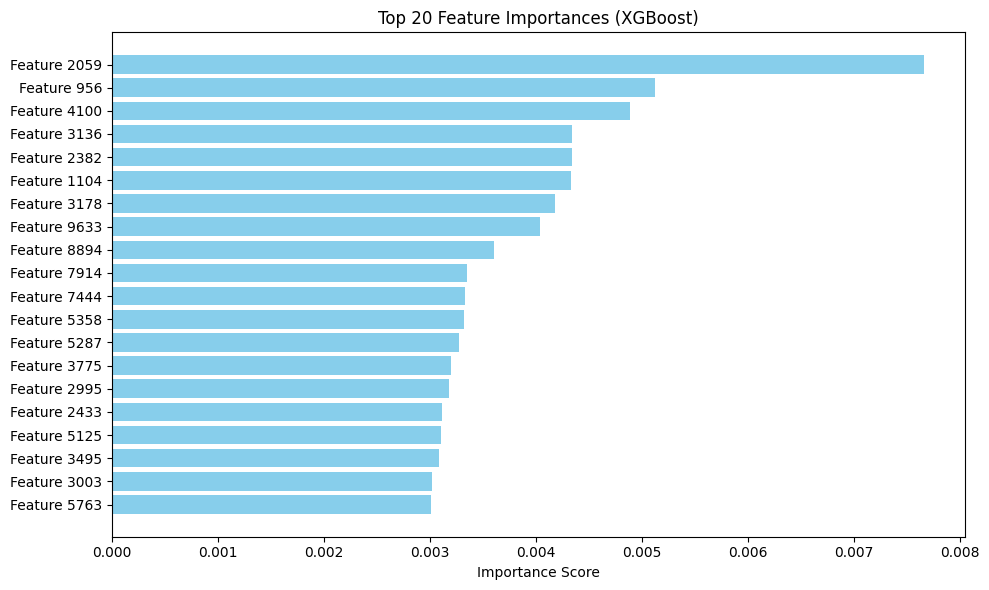

In [130]:
# Get feature importances
importances = xgb_final.feature_importances_
feature_names = X_train_multi.columns if hasattr(X_train_multi, 'columns') else [f'Feature {i}' for i in range(len(importances))]

# Create a DataFrame for sorting and visualization
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 20 features (adjust as needed)
plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'][:20][::-1], feat_df['Importance'][:20][::-1], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 20 Feature Importances (XGBoost)')
plt.tight_layout()
plt.savefig("Images/top_20_fearture_importances.png")
plt.show()

### **Final Note on Modeling**
* Despite applying resampling techniques to address class imbalance, the model's performance did not improve significantly. This indicates that other underlying factors in the dataset—such as noise, limited sample size, or overlapping class features—may be limiting the model’s ability to generalize well.

### **Model Performance Summary:**

#### * **Binary Classification**
**Best Model: Logistic Regression**

 Performance Highlights:
* Achieved high accuracy and demonstrated strong generalization.

* Effectively distinguished between positive and negative sentiments.

* A simple, interpretable model well-suited for linearly separable data.

 #### * **Multiclass Classification**
 **Best Model: XGBoost Classifier (with GridSearchCV tuning)**

**Performance Highlights:**

* Superior to Baseline Models
* Outperformed other candidates, including:

1. Multinomial Naive Bayes

2. XGBoost with SMOTE resampling

**Best Test Accuracy:**
* Achieved ~71% test accuracy, making it the most reliable among all models evaluated.

**Balanced Class Performance:**
* Delivered strong recall and precision for the dominant class (label 1) while maintaining reasonable performance on minority classes.

**Captures Complex Patterns:**
* Leveraged non-linear relationships and feature interactions, which are critical in real-world sentiment **classification tasks.**

**GridSearchCV Tuned Parameters:**

{
    'colsample_bytree': 1,
    'learning_rate': 0.3,
    'max_depth': 7,
    'n_estimators': 200,
    'subsample': 1
}

### **Limitation and Challenges**
* Class Imbalance Issue: The dataset suffers from class imbalance, where one sentiment class is dominant while others are underrepresented. This can result in biased models that are more accurate for the majority class but perform poorly on the minority classes. Addressing this issue is important to ensure fair and balanced sentiment analysis.

* Limited Dataset Size: The dataset used for sentiment analysis is relatively small, which can limit the model's ability to capture the full complexity of sentiments expressed in text. A larger and more diverse dataset would provide a broader representation of sentiments and improve the model's performance and generalization.

* Language Ambiguity and Sarcasm Detection: Language can be inherently ambiguous, and detecting sarcasm in text adds an extra layer of complexity. Sarcasm detection is challenging due to the subtleties and nuances involved. Developing robust strategies to handle language ambiguity and detect sarcasm is crucial for accurate sentiment analysis


## **7.Findings**


* Most tweets were directed to None brand category. This may indicate that customers were not engaging with the brand.

* Positive sentiments had the highest count compared to Negative sentiments, indicating that most people in general liked respective brands(Google and Apple)

* Most of the positive tweets were directed to Apple brands

* In the field of sentiment analysis, one of the significant challenges is dealing with language ambiguity and sarcasm detection. Natural language is complex and often subjective, making it difficult to accurately interpret sentiments from text.

* On average most of the tweets were 10-15 words long - more words increase ambiguity.

* NLP is a difficult task to model accurately.

## **8. Recommendations**

* To enhance sentiment understanding and improve brand perception, we recommend the following actions:

**1. Increase Customer Engagement**

* Actively interact with users on social media platforms like Twitter.


* Respond to both positive and negative feedback to build trust and loyalty.

**2. Monitor Churn Ratio**

* Track the rate at which customers stop using a product over time.


* High churn may signal dissatisfaction not fully captured by sentiment alone.

**3. Leverage Social Media Influencers**

* Collaborate with influencers to endorse products and shape public sentiment.


* Influencer campaigns can shift perception, especially for tech products like Apple or Google.

**4. Implement Direct Customer Feedback Channels**

* Introduce rating systems or short surveys post-interaction or purchase.


* This structured feedback can complement social media sentiment for more accurate insight.



## **8. Next Steps**

* In future work, we aim to enhance model performance and adaptability by exploring the following strategies:

**1. Advanced Modeling Techniques**

* Incorporate attention mechanisms (e.g., with transformers or LSTM-attention models) to better capture context and sentiment nuances within tweets.

**2. Ensemble Methods**

* Apply ensemble learning (e.g., stacking, boosting, or bagging) to combine strengths of multiple models and improve overall prediction robustness.

**3. Domain-Specific Fine-Tuning**

* Fine-tune models on industry-specific datasets (e.g., tech product reviews or consumer electronics) to improve relevance and classification accuracy.

By addressing current limitations and applying these enhancements, we aim to build a more accurate and adaptable sentiment analysis solution for real-world applications.

In [131]:
import joblib

# Save the trained model as a pickle file
joblib.dump(log_reg, 'logistic_regression_model.pkl')
joblib.dump(xgb_final, 'xgb.pkl')

['xgb.pkl']

In [132]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [133]:
import nltk
nltk.download('punkt', download_dir='nltk_data')
nltk.download('stopwords', download_dir='nltk_data')
nltk.download('wordnet', download_dir='nltk_data')

[nltk_data] Downloading package punkt to nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [134]:
# Save the cleaned dataset as Pickle (preserves lists, types, etc.)
data.to_pickle('Data/cleaned_dataset.pkl')
print("Saved cleaned dataset as Pickle successfully.")

# Later, you can load it like this:
data_loaded = pd.read_pickle('Data/cleaned_dataset.pkl')
print(data_loaded.head())
print(type(data_loaded.loc[0, 'tweet_text']))  # This will be a list

Saved cleaned dataset as Pickle successfully.
                                          tweet_text           recipient  \
0  [user, 3g, iphone, 3, hr, tweeting, riseaustin...              iPhone   
1  [user, know, user, awesome, ipadiphone, app, l...  iPad or iPhone App   
2            [user, wait, ipad, 2, also, sale, sxsw]                iPad   
3  [user, hope, year, festival, crashy, year, iph...  iPad or iPhone App   
4  [user, great, stuff, fri, sxsw, marissa, mayer...              Google   

    emotion   brand  tweet_length  \
0  Negative   Apple            23   
1  Positive   Apple            22   
2  Positive   Apple            15   
3  Negative   Apple            15   
4  Positive  Google            17   

                                   lemmatized_review  emotion_code  
0  user 3g iphone 3 hr tweeting riseaustin dead n...             0  
1  user know user awesome ipadiphone app likely a...             2  
2                    user wait ipad 2 also sale sxsw             2 